# Sentiment Analysis
---------------

In [1]:
import json
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException, StaleElementReferenceException
from selenium import webdriver
import os
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re
from datetime import datetime
import locale
import numpy as np
from selenium.common.exceptions import TimeoutException
from concurrent.futures import ThreadPoolExecutor
from lxml import html
from time import sleep
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  # Uncomment if stemming is desired
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
#warnings
import warnings
warnings.filterwarnings("ignore")



## Import Scraped Earnings Calls Transcripts From Both Companies RCL and NCLH
---------------


In [2]:
### reading csv file
# ED PATHS
#df_rcl = pd.read_csv(r'C:\Users\Edward Monbiot\Documents\nlp_project_mined_text\royal_caribbean_cruises.csv')
#df_nclh = pd.read_csv(r'C:\Users\Edward Monbiot\Documents\nlp_project_mined_text\norwegian_cruise_line.csv')

# MATHIEU FILE PATHS
#path = "/Users/mathieu26/Desktop/DSDM-BSE/Term_2/Text_Mining_and_Natural_Lan_Processing/Final_Project/"

# AMBER FILE PATHS
path = "/Users/amberwalker/advanced_nlp_project/"
df_rcl = pd.read_csv(path + 'royal_caribbean_cruises.csv')
df_nclh = pd.read_csv(path + 'norwegian_cruise_line.csv')
df_dal = pd.read_csv(path +'delta_air_lines_.csv')
df_luv = pd.read_csv(path + 'southwest_airlines.csv')


## Preprocess Earnings Calls Transcripts
---------------


In [3]:
#!pip install wordcloud

class TextPreprocessor:
    def __init__(self, dataframe):
        self.df = dataframe

    def generate_wordcloud(self, text_column, title):
        # Combine all texts into one large string
        combined_text = " ".join(text for text in self.df[text_column])
        
        # Generate a word cloud image
        wordcloud = WordCloud(background_color='white', max_words=200, contour_color='steelblue', 
                              width=800, height=400).generate(combined_text)
        
        # Display the word cloud using matplotlib
        plt.figure(figsize=(10, 5), dpi=300)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')  # Remove axis
        plt.show()

# Usage
# Assuming 'df' is your DataFrame containing the data
text_preprocessor = TextPreprocessor(df_rcl)



In [4]:
# Usage
# Assuming 'df' is your DataFrame containing the data
text_preprocessor = TextPreprocessor(df_nclh)


### Preprocessing Pipeline

In [5]:
class TextAnalyzer:
    def __init__(self, dataframe):
        self.df = dataframe
        nltk.download('stopwords')

    @staticmethod
    def remove_html_tags(text):
        pattern = re.compile('<.*?>')
        return pattern.sub('', text)

    @staticmethod
    def preprocess_text(text):
        # Lowercasing
        text = text.lower()
        # Remove HTML tags
        text = TextAnalyzer.remove_html_tags(text)
        # Remove special characters and punctuation
        text = re.sub(r'[^\w\s]+', '', text)
        # Remove numbers
        #text = re.sub(r'\d+', '', text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
        #Stemming (optional, uncomment if needed)
        stemmer = PorterStemmer()
        text = ' '.join([stemmer.stem(word) for word in text.split()])
        # Remove extra spaces
        text = text.strip().replace(r'\s+', ' ')
        return text

    def apply_preprocessing(self):
        self.df['CEO Text Cleaned'] = self.df['CEO Text'].apply(self.preprocess_text)
        self.df['CFO Text Cleaned'] = self.df['CFO Text'].apply(self.preprocess_text)

### Preprocessing RCL

In [6]:
# Usage
# Assuming 'df' is your DataFrame containing the data
text_analyzer = TextAnalyzer(df_rcl)
text_analyzer.apply_preprocessing()

# Rename the DataFrame to df_preprocessed
df_preprocessed_rcl = text_analyzer.df

# Now, df_preprocessed will have additional columns for preprocessed CEO and CFO texts
df_preprocessed_rcl.head(5)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amberwalker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Title          Date  \
0  Royal Caribbean Cruises (RCL) Q4 2023 Earnings...  Feb 01, 2024   
1  Royal Caribbean Cruises (RCL) Q3 2023 Earnings...  Oct 26, 2023   
2  Royal Caribbean Cruises (RCL) Q2 2023 Earnings...  Jul 27, 2023   
3  Royal Caribbean Cruises (RCL) Q1 2023 Earnings...  May 04, 2023   
4  Royal Caribbean Cruises (RCL) Q4 2022 Earnings...  Feb 07, 2023   

                                            CEO Text  \
0  Thank you, Michael, and good morning, everyone...   
1  Thank you, Michael, and good morning, everyone...   
2  Thank you, Michael, and good morning, everyone...   
3  Thank you, Michael, and good morning, everyone...   
4  Thank you, Michael, and good morning, everyone...   

                                            CFO Text  \
0  Thank you, Jason, and good morning everyone. L...   
1  Thank you, Jason, and good morning, everyone. ...   
2  Thank you, Jason, and good morning, everyone. ...   
3  Thank you, Jason, and good morning, everyone. ...   
4  Thank you, Jason, and good morning, everyone. ...   

                                                Link  \
0  https://www.fool.com/earnings/call-transcripts...   
1  https://www.fool.com/earnings/call-transcripts...   
2  https://www.fool.com/earnings/call-transcripts...   
3  https://www.fool.com/earnings/call-transcripts...   
4  https://www.fool.com/earnings/call-transcripts...   

                                    CEO Text Cleaned  \
0  thank michael good morn everyon get detail wou...   
1  thank michael good morn everyon begin today wo...   
2  thank michael good morn everyon im thrill shar...   
3  thank michael good morn everyon im thrill morn...   
4  thank michael good morn everyon get start beha...   

                                    CFO Text Cleaned  
0  thank jason good morn everyon let start review...  
1  thank jason good morn everyon let start thirdq...  
2  thank jason good morn everyon begin discuss re...  
3  thank jason good morn everyon let begin discus...  
4  thank jason good morn everyon let begin discus...

### Preprocessing NCLH

In [7]:
# Usage
# Assuming 'df' is your DataFrame containing the data
text_analyzer = TextAnalyzer(df_nclh)
text_analyzer.apply_preprocessing()

# Rename the DataFrame to df_preprocessed
df_preprocessed_nclh = text_analyzer.df

# Now, df_preprocessed will have additional columns for preprocessed CEO and CFO texts
df_preprocessed_nclh.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amberwalker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Title          Date  \
0  Norwegian Cruise Line (NCLH) Q4 2023 Earnings ...  Feb 27, 2024   
1  Norwegian Cruise Line (NCLH) Q3 2023 Earnings ...  Nov 01, 2023   
2  Norwegian Cruise Line (NCLH) Q2 2023 Earnings ...  Aug 01, 2023   
3  Norwegian Cruise Line (NCLH) Q1 2023 Earnings ...  May 01, 2023   
4  Norwegian Cruise Line (NCLH) Q4 2022 Earnings ...  Feb 28, 2023   

                                            CEO Text  \
0  Well, thank you, Sarah, and good morning, ever...   
1  Well, thank you, Jessica, and good morning, ev...   
2  Well, thank you, Jessica, and good morning, ev...   
3  Thank you, Jessica, and good morning, everyone...   
4  Thank you, Jessica, and good morning, everyone...   

                                            CFO Text  \
0  Thank you, Harry, and good morning, everyone. ...   
1  Thank you, Harry, and good morning, everyone. ...   
2  Thank you, Harry, and good morning, everyone. ...   
3  Thank you, Harry, and good morning, everyone. ...   
4  Thank you, Frank, and good morning, everyone. ...   

                                                Link  \
0  https://www.fool.com/earnings/call-transcripts...   
1  https://www.fool.com/earnings/call-transcripts...   
2  https://www.fool.com/earnings/call-transcripts...   
3  https://www.fool.com/earnings/call-transcripts...   
4  https://www.fool.com/earnings/call-transcripts...   

                                    CEO Text Cleaned  \
0  well thank sarah good morn everyon thank join ...   
1  well thank jessica good morn everyon thank joi...   
2  well thank jessica good morn everyon thank joi...   
3  thank jessica good morn everyon thank join us ...   
4  thank jessica good morn everyon thank join us ...   

                                    CFO Text Cleaned  
0  thank harri good morn everyon commentari today...  
1  thank harri good morn everyon commentari today...  
2  thank harri good morn everyon commentari today...  
3  thank harri good morn everyon dive financi res...  
4  thank frank good morn everyon commentari today...

### Preprocessing DAL

In [8]:
# Usage
# Assuming 'df' is your DataFrame containing the data
text_analyzer = TextAnalyzer(df_dal)
text_analyzer.apply_preprocessing()

# Rename the DataFrame to df_preprocessed
df_preprocessed_dal = text_analyzer.df

# Now, df_preprocessed will have additional columns for preprocessed CEO and CFO texts
df_preprocessed_dal.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amberwalker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Title          Date  \
0  Delta Air Lines (DAL) Q4 2023 Earnings Call Tr...  Jan 12, 2024   
1  Delta Air Lines (DAL) Q3 2023 Earnings Call Tr...  Oct 12, 2023   
2  Delta Air Lines (DAL) Q2 2023 Earnings Call Tr...  Jul 13, 2023   
3  Delta Air Lines (DAL) Q4 2022 Earnings Call Tr...  Jan 13, 2023   
4  Delta Air Lines (DAL) Q3 2022 Earnings Call Tr...  Oct 13, 2022   

                                            CEO Text  \
0  Well, thank you, Julie, and good morning, ever...   
1  Well, thank you, Julie, and good morning, ever...   
2  Thanks, Julie. Good morning, everyone. We appr...   
3  Thank you, Julie. Good morning, everyone. We a...   
4  Well, thank you, Julie, and good morning, ever...   

                                            CFO Text  \
0  Thank you, Glen, and good morning to everyone....   
1  Thank you, Glen, and good morning to everyone....   
2  Great. Thank you, Glen, and good morning to ev...   
3  Great. Thank you, Glen. In 2022, we made signi...   
4  Thank you, Glen, and good morning to everyone....   

                                                Link  \
0  https://www.fool.com/earnings/call-transcripts...   
1  https://www.fool.com/earnings/call-transcripts...   
2  https://www.fool.com/earnings/call-transcripts...   
3  https://www.fool.com/earnings/call-transcripts...   
4  https://www.fool.com/earnings/call-transcripts...   

                                    CEO Text Cleaned  \
0  well thank juli good morn everyon appreci join...   
1  well thank juli good morn everyon appreci join...   
2  thank juli good morn everyon appreci join us t...   
3  thank juli good morn everyon appreci join us t...   
4  well thank juli good morn everyon appreci join...   

                                    CFO Text Cleaned  
0  thank glen good morn everyon 2023 anoth meanin...  
1  thank glen good morn everyon septemb quarter d...  
2  great thank glen good morn everyon june quarte...  
3  great thank glen 2022 made signific progress r...  
4  thank glen good morn everyon septemb quarter d...

### Preprocessing LUV

In [9]:
# Usage
# Assuming 'df' is your DataFrame containing the data
text_analyzer = TextAnalyzer(df_luv)
text_analyzer.apply_preprocessing()

# Rename the DataFrame to df_preprocessed
df_preprocessed_luv = text_analyzer.df

# Now, df_preprocessed will have additional columns for preprocessed CEO and CFO texts
df_preprocessed_luv.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amberwalker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Title          Date  \
0  Southwest Airlines (LUV) Q4 2023 Earnings Call...  Jan 25, 2024   
1  Southwest Airlines (LUV) Q3 2023 Earnings Call...  Oct 26, 2023   
2  Southwest Airlines (LUV) Q2 2023 Earnings Call...  Jul 27, 2023   
3  Southwest Airlines (LUV) Q1 2023 Earnings Call...  Apr 27, 2023   
4  Southwest Airlines (LUV) Q4 2022 Earnings Call...  Jan 26, 2023   

                                            CEO Text  \
0  Thank you, Julie, and thank you, everyone, for...   
1  Well, thanks, Julia, and good morning, everyon...   
2  Thanks Julia, and good morning, everyone. I ap...   
3  Thank you, Ryan, and thank you, everyone, for ...   
4  All right. Thank you, Ryan, and I appreciate e...   

                                            CFO Text  \
0  Thank you, Bob, and hello, everyone. As Bob me...   
1  Thank you, Bob, and hello, everyone. First, I ...   
2  Thank you, Bob, and hello, everyone. First, I'...   
3  Thank you, Bob, and hello, everyone. Our first...   
4  Thank you, Andrew. And hello, everyone. I will...   

                                                Link  \
0  https://www.fool.com/earnings/call-transcripts...   
1  https://www.fool.com/earnings/call-transcripts...   
2  https://www.fool.com/earnings/call-transcripts...   
3  https://www.fool.com/earnings/call-transcripts...   
4  https://www.fool.com/earnings/call-transcripts...   

                                    CEO Text Cleaned  \
0  thank juli thank everyon join call today close...   
1  well thank julia good morn everyon jump financ...   
2  thank julia good morn everyon appreci join us ...   
3  thank ryan thank everyon join us morn incur fi...   
4  right thank ryan appreci everybodi join us mor...   

                                    CFO Text Cleaned  
0  thank bob hello everyon bob mention 2023 wasnt...  
1  thank bob hello everyon first would like exten...  
2  thank bob hello everyon first id like extend a...  
3  thank bob hello everyon first quarter loss dis...  
4  thank andrew hello everyon provid quick overvi...

In [10]:
#remove any points from date column
df_preprocessed_rcl['Date'] = df_rcl['Date'].str.replace('.', '')
df_preprocessed_nclh['Date'] = df_nclh['Date'].str.replace('.', '')
df_preprocessed_dal['Date'] = df_dal['Date'].str.replace('.', '')
df_preprocessed_luv['Date'] = df_luv['Date'].str.replace('.', '')

## TF-IDF WordCloud Vizualization - Displaying the most important words used by the CEO and the CEO
----------------

To vizualise the most important terms commonly used by the CEO and the CFO, we first constructed a TF-IDF document term matrix. 

Secondly, we aggregated the CEO and CFO text from all transcript.

Thirdly, we build a function that will plot a wordcloud where the most important terms are represented with a larger size. 

In [11]:
def aggregate_ceo_cfo_transcripts(datasets):
    ceo_texts = []
    cfo_texts = []
    
    for df in datasets:
        for index, row in df.iterrows():
            ceo_text = row['CEO Text Cleaned']
            cfo_text = row['CFO Text Cleaned']
            
            ceo_texts.append(ceo_text)
            cfo_texts.append(cfo_text)
    
    # Create a new DataFrame to store aggregated CEO and CFO texts
    aggregated_df = pd.DataFrame({'CEO Text Aggregated': ceo_texts,
                                  'CFO Text Aggregated': cfo_texts})
    
    return aggregated_df

# Assuming you have four datasets named df1, df2, df3, and df4
datasets = [df_preprocessed_rcl, df_preprocessed_nclh, df_preprocessed_dal, df_preprocessed_luv]

# Call the function to aggregate CEO and CFO transcripts
aggregated_transcripts_df = aggregate_ceo_cfo_transcripts(datasets)

# Display the aggregated DataFrame
aggregated_transcripts_df.head(5)


CEO Text Aggregated  \
0  thank michael good morn everyon get detail wou...   
1  thank michael good morn everyon begin today wo...   
2  thank michael good morn everyon im thrill shar...   
3  thank michael good morn everyon im thrill morn...   
4  thank michael good morn everyon get start beha...   

                                 CFO Text Aggregated  
0  thank jason good morn everyon let start review...  
1  thank jason good morn everyon let start thirdq...  
2  thank jason good morn everyon begin discuss re...  
3  thank jason good morn everyon let begin discus...  
4  thank jason good morn everyon let begin discus...

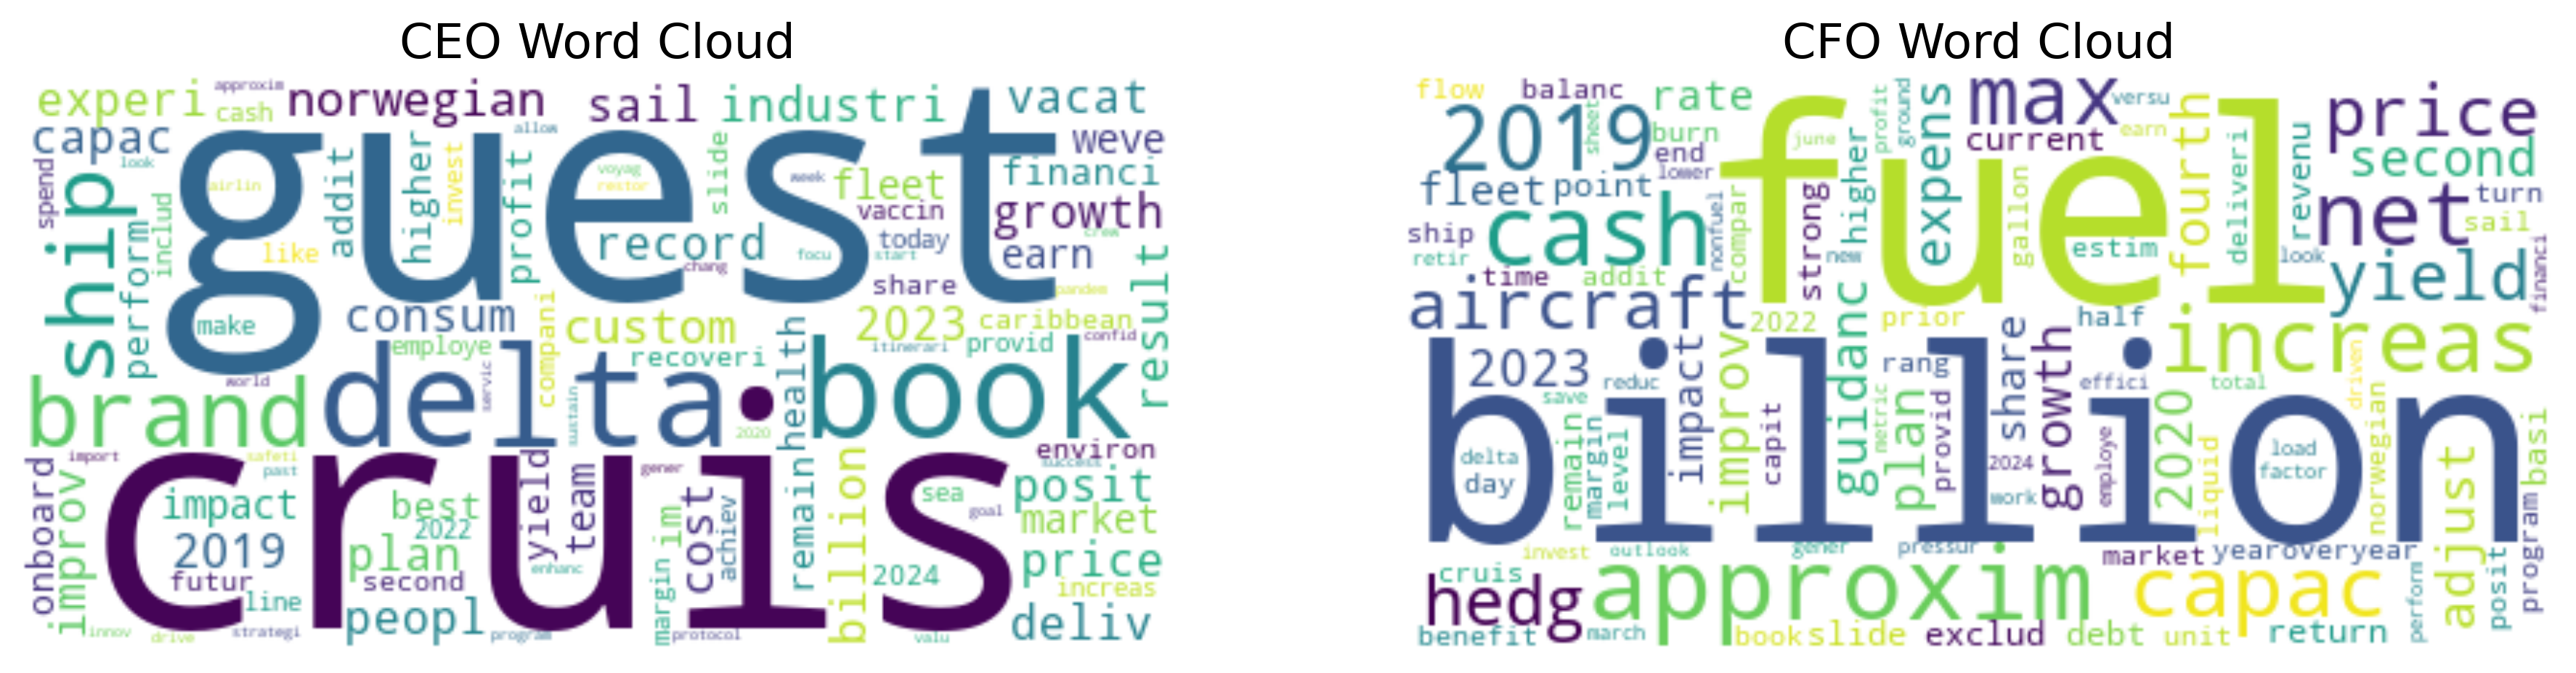

In [12]:
def calculate_tf_idf_plot(df, ceo_column, cfo_column, company_name):
    # Initialize the TF-IDF Vectorizer with adjusted parameters
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2, use_idf=True, norm=None)

    # Fit and transform the CEO text to get TF-IDF features
    vectors_ceo = vectorizer.fit_transform(df[ceo_column])
    feature_names_ceo = vectorizer.get_feature_names_out()
    dense_ceo = vectors_ceo.todense()
    denselist_ceo = dense_ceo.tolist()

    # Create a DataFrame from the dense list for CEO
    tfidf_df_ceo = pd.DataFrame(denselist_ceo, columns=feature_names_ceo)

    # Aggregate TF-IDF scores for each term across all CEO documents
    term_frequencies_ceo = tfidf_df_ceo.sum(axis=0)

    # Fit and transform the CFO text to get TF-IDF features
    vectors_cfo = vectorizer.fit_transform(df[cfo_column])
    feature_names_cfo = vectorizer.get_feature_names_out()
    dense_cfo = vectors_cfo.todense()
    denselist_cfo = dense_cfo.tolist()

    # Create a DataFrame from the dense list for CFO
    tfidf_df_cfo = pd.DataFrame(denselist_cfo, columns=feature_names_cfo)

    # Aggregate TF-IDF scores for each term across all CFO documents
    term_frequencies_cfo = tfidf_df_cfo.sum(axis=0)

    # Create a word cloud for CEO text
    wordcloud_ceo = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue')

    # Generate the word cloud for CEO text
    wordcloud_ceo.generate_from_frequencies(term_frequencies_ceo)

    # Create a word cloud for CFO text
    wordcloud_cfo = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue')

    # Generate the word cloud for CFO text
    wordcloud_cfo.generate_from_frequencies(term_frequencies_cfo)

    # Plot CEO and CFO word clouds side by side
    fig, axs = plt.subplots(1, 2, figsize=(15, 8), dpi=300)

    # Plot CEO word cloud
    axs[0].imshow(wordcloud_ceo, interpolation='bilinear')
    axs[0].set_title('CEO Word Cloud', fontsize=16)
    axs[0].axis('off')

    # Plot CFO word cloud
    axs[1].imshow(wordcloud_cfo, interpolation='bilinear')
    axs[1].set_title('CFO Word Cloud', fontsize=16)
    axs[1].axis('off')

    plt.show()

# Call the function to calculate and display the word clouds for CEO and CFO texts
calculate_tf_idf_plot(aggregated_transcripts_df, 'CEO Text Aggregated', 'CFO Text Aggregated', 'Company Name')


Table of most important terms for CEO and CFO:

In [13]:
from tabulate import tabulate

# Initialize the TF-IDF Vectorizer with adjusted parameters for CEO
vectorizer_ceo = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2, use_idf=True, norm=None)

# Fit and transform the CEO text to get TF-IDF features
vectors_ceo = vectorizer_ceo.fit_transform(aggregated_transcripts_df['CEO Text Aggregated'])
feature_names_ceo = vectorizer_ceo.get_feature_names_out()

# Aggregate TF-IDF scores for each term across all CEO documents
term_frequencies_ceo = vectors_ceo.sum(axis=0)

# Get indices of top 20 most important words for CEO
top_20_indices_ceo = np.argsort(-term_frequencies_ceo)[:20]

# Get the corresponding words for CEO
top_20_words_ceo = [feature_names_ceo[idx] for idx in top_20_indices_ceo]

# Initialize the TF-IDF Vectorizer with adjusted parameters for CFO
vectorizer_cfo = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2, use_idf=True, norm=None)

# Fit and transform the CFO text to get TF-IDF features
vectors_cfo = vectorizer_cfo.fit_transform(aggregated_transcripts_df['CFO Text Aggregated'])
feature_names_cfo = vectorizer_cfo.get_feature_names_out()

# Aggregate TF-IDF scores for each term across all CFO documents
term_frequencies_cfo = vectors_cfo.sum(axis=0)

# Get indices of top 20 most important words for CFO
top_20_indices_cfo = np.argsort(-term_frequencies_cfo)[:20]

# Get the corresponding words for CFO
top_20_words_cfo = [feature_names_cfo[idx] for idx in top_20_indices_cfo]

# Display the list of top 20 words for CEO
print("Top 20 Most Important Words for CEO:")
print(top_20_words_ceo)

# Display the list of top 20 words for CFO
print("\nTop 20 Most Important Words for CFO:")
print(top_20_words_cfo)

Top 20 Most Important Words for CEO:
[array([['cruis', 'guest', 'delta', ..., 'mere', 'stick', 'deceler']],
      dtype=object)]

Top 20 Most Important Words for CFO:
[array([['billion', 'fuel', 'approxim', ..., 'entri', 'disconnect',
        'zero']], dtype=object)]


## Sentiment Analysis
--------

In [15]:
# Define the path to your file
# file_path = r'C:\Users\Edward Monbiot\Documents\Loughran-McDonald_MasterDictionary_1993-2023.csv'

# MATHIEU FILE PATH
file_path = 'Loughran-McDonald_MasterDictionary_1993-2023.csv'

# Read the file into a pandas DataFrame
master_dictionary_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
master_dictionary_df.head(5)


Word  Seq_num  Word Count  Word Proportion  Average Proportion  \
0   AARDVARK        1         664     2.690000e-08        1.860000e-08   
1  AARDVARKS        2           3     1.210000e-10        8.230000e-12   
2      ABACI        3           9     3.640000e-10        1.110000e-10   
3      ABACK        4          29     1.170000e-09        6.330000e-10   
4     ABACUS        5        9349     3.790000e-07        3.830000e-07   

        Std Dev  Doc Count  Negative  Positive  Uncertainty  Litigious  \
0  4.050000e-06        131         0         0            0          0   
1  9.020000e-09          1         0         0            0          0   
2  5.160000e-08          7         0         0            0          0   
3  1.560000e-07         28         0         0            0          0   
4  3.460000e-05       1239         0         0            0          0   

   Strong_Modal  Weak_Modal  Constraining  Complexity  Syllables     Source  
0             0           0             0           0          2  12of12inf  
1             0           0             0           0          2  12of12inf  
2             0           0             0           0          3  12of12inf  
3             0           0             0           0          2  12of12inf  
4             0           0             0           0          3  12of12inf

### LoughranMcDonaldSentimentAnalyzer pipeline to do the sentiment analysis

In [16]:
#class to perform sentiment analysis
class LoughranMcDonaldSentimentAnalyzer:
    def __init__(self, df_preprocessed, master_dictionary_df):
        self.df = df_preprocessed
        self.master_dictionary_df = master_dictionary_df
        self.sentiment_words = self._extract_sentiment_words()

    def _extract_sentiment_words(self):
        sentiments = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining']
        sentiment_words = {}
        for sentiment in sentiments:
            sentiment_words[sentiment] = set(self.master_dictionary_df[
                self.master_dictionary_df[sentiment] != 0]['Word'].str.upper().tolist())
        return sentiment_words

    def count_sentiment_words(self, text, sentiment):
        words = text.upper().split()
        return sum(word in self.sentiment_words[sentiment] for word in words)

    def apply_sentiment_analysis(self):
        for sentiment in self.sentiment_words.keys():
            self.df[f'CEO {sentiment} Count'] = self.df['CEO Text Cleaned'].apply(
                lambda x: self.count_sentiment_words(x, sentiment))
            self.df[f'CFO {sentiment} Count'] = self.df['CFO Text Cleaned'].apply(
                lambda x: self.count_sentiment_words(x, sentiment))

    def calculate_total_word_count(self):
        self.df['CEO Total Word Count'] = self.df['CEO Text Cleaned'].apply(lambda x: len(x.split()))
        self.df['CFO Total Word Count'] = self.df['CFO Text Cleaned'].apply(lambda x: len(x.split()))

    def calculate_net_sentiment_score(self):
        # Make sure to call calculate_total_word_count before this method
        self.calculate_total_word_count()
        self.df['CEO Sentiment Score'] = (self.df['CEO Positive Count'] - self.df['CEO Negative Count']) / self.df['CEO Total Word Count']
        self.df['CFO Sentiment Score'] = (self.df['CFO Positive Count'] - self.df['CFO Negative Count']) / self.df['CFO Total Word Count']


    def standardize_dates(self):
        self.df['Date'] = pd.to_datetime(self.df['Date'], errors='coerce').dt.date



### Applying LoughranMcDonaldSentimentAnalyzer pipeline to RCL

In [17]:
# Usage example
sentiment_analyzer = LoughranMcDonaldSentimentAnalyzer(df_preprocessed_rcl, master_dictionary_df)
sentiment_analyzer.apply_sentiment_analysis()
sentiment_analyzer.calculate_net_sentiment_score()
sentiment_analyzer.standardize_dates()

# Display the DataFrame to verify changes
df_lm_rcl = sentiment_analyzer.df
df_lm_rcl.head(5)


Title        Date  \
0  Royal Caribbean Cruises (RCL) Q4 2023 Earnings...  2024-02-01   
1  Royal Caribbean Cruises (RCL) Q3 2023 Earnings...  2023-10-26   
2  Royal Caribbean Cruises (RCL) Q2 2023 Earnings...  2023-07-27   
3  Royal Caribbean Cruises (RCL) Q1 2023 Earnings...  2023-05-04   
4  Royal Caribbean Cruises (RCL) Q4 2022 Earnings...  2023-02-07   

                                            CEO Text  \
0  Thank you, Michael, and good morning, everyone...   
1  Thank you, Michael, and good morning, everyone...   
2  Thank you, Michael, and good morning, everyone...   
3  Thank you, Michael, and good morning, everyone...   
4  Thank you, Michael, and good morning, everyone...   

                                            CFO Text  \
0  Thank you, Jason, and good morning everyone. L...   
1  Thank you, Jason, and good morning, everyone. ...   
2  Thank you, Jason, and good morning, everyone. ...   
3  Thank you, Jason, and good morning, everyone. ...   
4  Thank you, Jason, and good morning, everyone. ...   

                                                Link  \
0  https://www.fool.com/earnings/call-transcripts...   
1  https://www.fool.com/earnings/call-transcripts...   
2  https://www.fool.com/earnings/call-transcripts...   
3  https://www.fool.com/earnings/call-transcripts...   
4  https://www.fool.com/earnings/call-transcripts...   

                                    CEO Text Cleaned  \
0  thank michael good morn everyon get detail wou...   
1  thank michael good morn everyon begin today wo...   
2  thank michael good morn everyon im thrill shar...   
3  thank michael good morn everyon im thrill morn...   
4  thank michael good morn everyon get start beha...   

                                    CFO Text Cleaned  CEO Negative Count  \
0  thank jason good morn everyon let start review...                   2   
1  thank jason good morn everyon let start thirdq...                   7   
2  thank jason good morn everyon begin discuss re...                   4   
3  thank jason good morn everyon let begin discus...                   4   
4  thank jason good morn everyon let begin discus...                   3   

   CFO Negative Count  CEO Positive Count  ...  CEO Uncertainty Count  \
0                   6                  36  ...                      0   
1                   3                  44  ...                      0   
2                   1                  37  ...                      3   
3                   5                  53  ...                      0   
4                  14                  29  ...                      1   

   CFO Uncertainty Count  CEO Litigious Count  CFO Litigious Count  \
0                      3                    1                    2   
1                      1                    2                    0   
2                      2                    2                    0   
3                      0                    1                    0   
4                      1                    2                    0   

   CEO Constraining Count  CFO Constraining Count  CEO Total Word Count  \
0                       2                       2                  1114   
1                       1                       2                  1076   
2                       1                       1                   816   
3                       3                       3                   959   
4                       2                       2                   983   

   CFO Total Word Count  CEO Sentiment Score  CFO Sentiment Score  
0                   931             0.030521             0.011815  
1                   837             0.034387             0.015532  
2                   734             0.040441             0.021798  
3                   704             0.051095             0.031250  
4                   891             0.026450             0.004489  

[5 rows x 21 columns]

### Applying LoughranMcDonaldSentimentAnalyzer pipeline to NCLH

In [18]:

# Usage example
sentiment_analyzer = LoughranMcDonaldSentimentAnalyzer(df_preprocessed_nclh, master_dictionary_df)
sentiment_analyzer.apply_sentiment_analysis()
sentiment_analyzer.calculate_net_sentiment_score()
sentiment_analyzer.standardize_dates()

# Display the DataFrame to verify changes
df_lm_nclh = sentiment_analyzer.df
df_lm_nclh.head(5)


Title        Date  \
0  Norwegian Cruise Line (NCLH) Q4 2023 Earnings ...  2024-02-27   
1  Norwegian Cruise Line (NCLH) Q3 2023 Earnings ...  2023-11-01   
2  Norwegian Cruise Line (NCLH) Q2 2023 Earnings ...  2023-08-01   
3  Norwegian Cruise Line (NCLH) Q1 2023 Earnings ...  2023-05-01   
4  Norwegian Cruise Line (NCLH) Q4 2022 Earnings ...  2023-02-28   

                                            CEO Text  \
0  Well, thank you, Sarah, and good morning, ever...   
1  Well, thank you, Jessica, and good morning, ev...   
2  Well, thank you, Jessica, and good morning, ev...   
3  Thank you, Jessica, and good morning, everyone...   
4  Thank you, Jessica, and good morning, everyone...   

                                            CFO Text  \
0  Thank you, Harry, and good morning, everyone. ...   
1  Thank you, Harry, and good morning, everyone. ...   
2  Thank you, Harry, and good morning, everyone. ...   
3  Thank you, Harry, and good morning, everyone. ...   
4  Thank you, Frank, and good morning, everyone. ...   

                                                Link  \
0  https://www.fool.com/earnings/call-transcripts...   
1  https://www.fool.com/earnings/call-transcripts...   
2  https://www.fool.com/earnings/call-transcripts...   
3  https://www.fool.com/earnings/call-transcripts...   
4  https://www.fool.com/earnings/call-transcripts...   

                                    CEO Text Cleaned  \
0  well thank sarah good morn everyon thank join ...   
1  well thank jessica good morn everyon thank joi...   
2  well thank jessica good morn everyon thank joi...   
3  thank jessica good morn everyon thank join us ...   
4  thank jessica good morn everyon thank join us ...   

                                    CFO Text Cleaned  CEO Negative Count  \
0  thank harri good morn everyon commentari today...                   6   
1  thank harri good morn everyon commentari today...                  19   
2  thank harri good morn everyon commentari today...                   9   
3  thank harri good morn everyon dive financi res...                   2   
4  thank frank good morn everyon commentari today...                   8   

   CFO Negative Count  CEO Positive Count  ...  CEO Uncertainty Count  \
0                   4                  36  ...                      3   
1                   9                  31  ...                      1   
2                   5                  34  ...                      4   
3                   4                  10  ...                      0   
4                   4                  18  ...                      2   

   CFO Uncertainty Count  CEO Litigious Count  CFO Litigious Count  \
0                      4                    1                    1   
1                      0                    4                    3   
2                      1                    3                    2   
3                      1                    0                    3   
4                      0                    7                    2   

   CEO Constraining Count  CFO Constraining Count  CEO Total Word Count  \
0                       3                       3                  1064   
1                       4                       1                  1314   
2                       2                       4                  1298   
3                       0                       4                   388   
4                       1                       9                   811   

   CFO Total Word Count  CEO Sentiment Score  CFO Sentiment Score  
0                  1023             0.028195             0.016618  
1                   814             0.009132             0.007371  
2                   991             0.019260             0.012109  
3                   812             0.020619             0.009852  
4                   846             0.012330             0.005910  

[5 rows x 21 columns]

### Applying LoughranMcDonaldSentimentAnalyzer pipeline to DAL

In [19]:
# Usage example
sentiment_analyzer = LoughranMcDonaldSentimentAnalyzer(df_preprocessed_dal, master_dictionary_df)
sentiment_analyzer.apply_sentiment_analysis()
sentiment_analyzer.calculate_net_sentiment_score()
sentiment_analyzer.standardize_dates()

# Display the DataFrame to verify changes
df_lm_dal = sentiment_analyzer.df
df_lm_dal.head(5)


Title        Date  \
0  Delta Air Lines (DAL) Q4 2023 Earnings Call Tr...  2024-01-12   
1  Delta Air Lines (DAL) Q3 2023 Earnings Call Tr...  2023-10-12   
2  Delta Air Lines (DAL) Q2 2023 Earnings Call Tr...  2023-07-13   
3  Delta Air Lines (DAL) Q4 2022 Earnings Call Tr...  2023-01-13   
4  Delta Air Lines (DAL) Q3 2022 Earnings Call Tr...  2022-10-13   

                                            CEO Text  \
0  Well, thank you, Julie, and good morning, ever...   
1  Well, thank you, Julie, and good morning, ever...   
2  Thanks, Julie. Good morning, everyone. We appr...   
3  Thank you, Julie. Good morning, everyone. We a...   
4  Well, thank you, Julie, and good morning, ever...   

                                            CFO Text  \
0  Thank you, Glen, and good morning to everyone....   
1  Thank you, Glen, and good morning to everyone....   
2  Great. Thank you, Glen, and good morning to ev...   
3  Great. Thank you, Glen. In 2022, we made signi...   
4  Thank you, Glen, and good morning to everyone....   

                                                Link  \
0  https://www.fool.com/earnings/call-transcripts...   
1  https://www.fool.com/earnings/call-transcripts...   
2  https://www.fool.com/earnings/call-transcripts...   
3  https://www.fool.com/earnings/call-transcripts...   
4  https://www.fool.com/earnings/call-transcripts...   

                                    CEO Text Cleaned  \
0  well thank juli good morn everyon appreci join...   
1  well thank juli good morn everyon appreci join...   
2  thank juli good morn everyon appreci join us t...   
3  thank juli good morn everyon appreci join us t...   
4  well thank juli good morn everyon appreci join...   

                                    CFO Text Cleaned  CEO Negative Count  \
0  thank glen good morn everyon 2023 anoth meanin...                   3   
1  thank glen good morn everyon septemb quarter d...                   6   
2  great thank glen good morn everyon june quarte...                   1   
3  great thank glen 2022 made signific progress r...                   6   
4  thank glen good morn everyon septemb quarter d...                   5   

   CFO Negative Count  CEO Positive Count  ...  CEO Uncertainty Count  \
0                   0                  14  ...                      2   
1                   1                  12  ...                      0   
2                   2                  21  ...                      1   
3                   3                  17  ...                      0   
4                   3                  17  ...                      0   

   CFO Uncertainty Count  CEO Litigious Count  CFO Litigious Count  \
0                      0                    0                    1   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    2                    0   
4                      0                    0                    0   

   CEO Constraining Count  CFO Constraining Count  CEO Total Word Count  \
0                       0                       1                   669   
1                       1                       1                   563   
2                       3                       0                   501   
3                       1                       0                   653   
4                       1                       0                   551   

   CFO Total Word Count  CEO Sentiment Score  CFO Sentiment Score  
0                   477             0.016442             0.010482  
1                   427             0.010657             0.021077  
2                   370             0.039920             0.013514  
3                   477             0.016845             0.008386  
4                   383             0.021779             0.013055  

[5 rows x 21 columns]

### Applying LoughranMcDonaldSentimentAnalyzer pipeline to LUV

In [20]:
# Usage example
sentiment_analyzer = LoughranMcDonaldSentimentAnalyzer(df_preprocessed_luv, master_dictionary_df)
sentiment_analyzer.apply_sentiment_analysis()
sentiment_analyzer.calculate_net_sentiment_score()
sentiment_analyzer.standardize_dates()

# Display the DataFrame to verify changes
df_lm_luv = sentiment_analyzer.df
df_lm_luv.head(5)


Title        Date  \
0  Southwest Airlines (LUV) Q4 2023 Earnings Call...  2024-01-25   
1  Southwest Airlines (LUV) Q3 2023 Earnings Call...  2023-10-26   
2  Southwest Airlines (LUV) Q2 2023 Earnings Call...  2023-07-27   
3  Southwest Airlines (LUV) Q1 2023 Earnings Call...  2023-04-27   
4  Southwest Airlines (LUV) Q4 2022 Earnings Call...  2023-01-26   

                                            CEO Text  \
0  Thank you, Julie, and thank you, everyone, for...   
1  Well, thanks, Julia, and good morning, everyon...   
2  Thanks Julia, and good morning, everyone. I ap...   
3  Thank you, Ryan, and thank you, everyone, for ...   
4  All right. Thank you, Ryan, and I appreciate e...   

                                            CFO Text  \
0  Thank you, Bob, and hello, everyone. As Bob me...   
1  Thank you, Bob, and hello, everyone. First, I ...   
2  Thank you, Bob, and hello, everyone. First, I'...   
3  Thank you, Bob, and hello, everyone. Our first...   
4  Thank you, Andrew. And hello, everyone. I will...   

                                                Link  \
0  https://www.fool.com/earnings/call-transcripts...   
1  https://www.fool.com/earnings/call-transcripts...   
2  https://www.fool.com/earnings/call-transcripts...   
3  https://www.fool.com/earnings/call-transcripts...   
4  https://www.fool.com/earnings/call-transcripts...   

                                    CEO Text Cleaned  \
0  thank juli thank everyon join call today close...   
1  well thank julia good morn everyon jump financ...   
2  thank julia good morn everyon appreci join us ...   
3  thank ryan thank everyon join us morn incur fi...   
4  right thank ryan appreci everybodi join us mor...   

                                    CFO Text Cleaned  CEO Negative Count  \
0  thank bob hello everyon bob mention 2023 wasnt...                   7   
1  thank bob hello everyon first would like exten...                   3   
2  thank bob hello everyon first id like extend a...                   7   
3  thank bob hello everyon first quarter loss dis...                   5   
4  thank andrew hello everyon provid quick overvi...                  19   

   CFO Negative Count  CEO Positive Count  ...  CEO Uncertainty Count  \
0                   3                  17  ...                      0   
1                   2                  11  ...                      0   
2                   0                   9  ...                      1   
3                   9                  11  ...                      1   
4                  21                   4  ...                      4   

   CFO Uncertainty Count  CEO Litigious Count  CFO Litigious Count  \
0                      1                    2                    3   
1                      0                    1                    0   
2                      0                    1                    0   
3                      1                    1                    2   
4                      0                    0                    2   

   CEO Constraining Count  CFO Constraining Count  CEO Total Word Count  \
0                       1                       0                   513   
1                       0                       1                   364   
2                       0                       0                   484   
3                       1                       1                   484   
4                       0                       1                   694   

   CFO Total Word Count  CEO Sentiment Score  CFO Sentiment Score  
0                   850             0.019493             0.016471  
1                   501             0.021978             0.005988  
2                   581             0.004132             0.008606  
3                   746             0.012397             0.000000  
4                   784            -0.021614            -0.017857  

[5 rows x 21 columns]

## Sentiment Scores Plots

---------

Sentiment Score = Count of Positive Words - Count of Negative Words

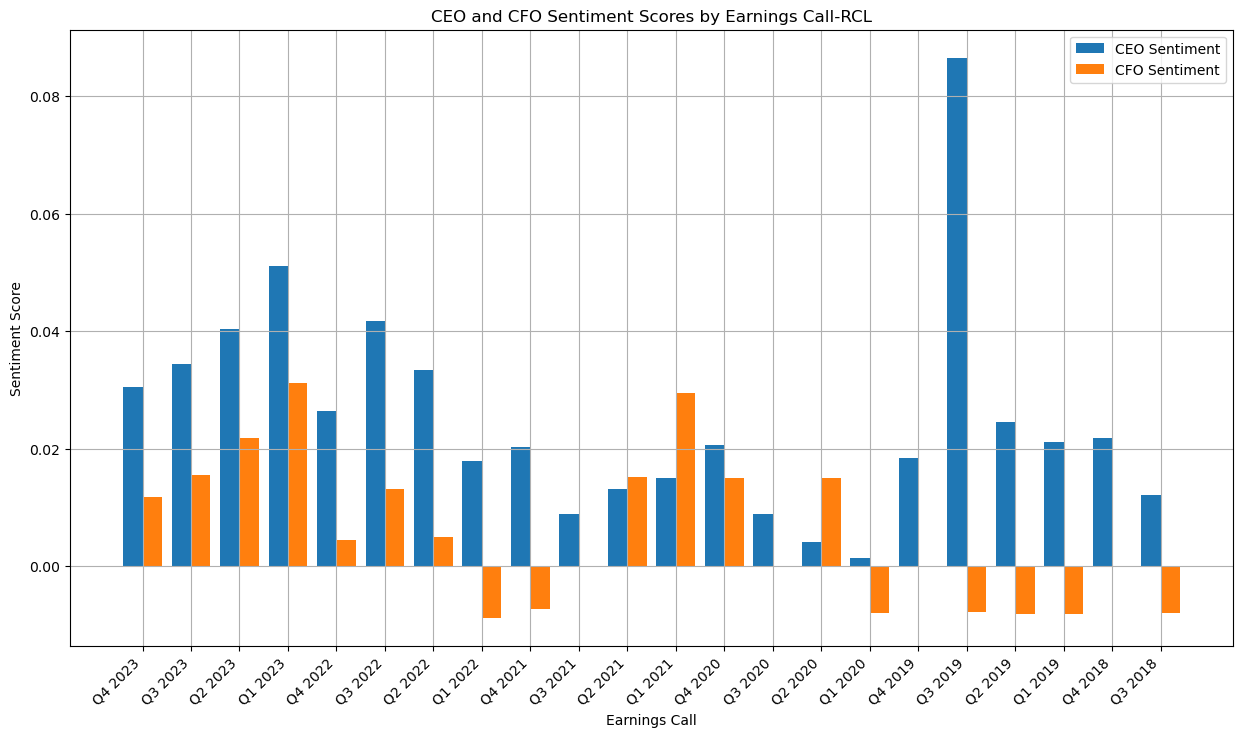

In [21]:
# Extracting relevant part from the 'Title'
df_lm_rcl['Earnings Call'] = df_lm_rcl['Title'].str.extract(r'\(RCL\) (.*?) Earnings')

plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

# Plotting bar chart
x = range(len(df_lm_rcl))
plt.bar([a - 0.2 for a in x], df_lm_rcl['CEO Sentiment Score'], width=0.4, label='CEO Sentiment', align='center')
plt.bar([a + 0.2 for a in x], df_lm_rcl['CFO Sentiment Score'], width=0.4, label='CFO Sentiment', align='center')

# Formatting the plot
plt.xlabel('Earnings Call')
plt.ylabel('Sentiment Score')
plt.title('CEO and CFO Sentiment Scores by Earnings Call-RCL')
plt.xticks(x, df_lm_rcl['Earnings Call'], rotation=45, ha='right')  # Use the extracted part for x-axis labels
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


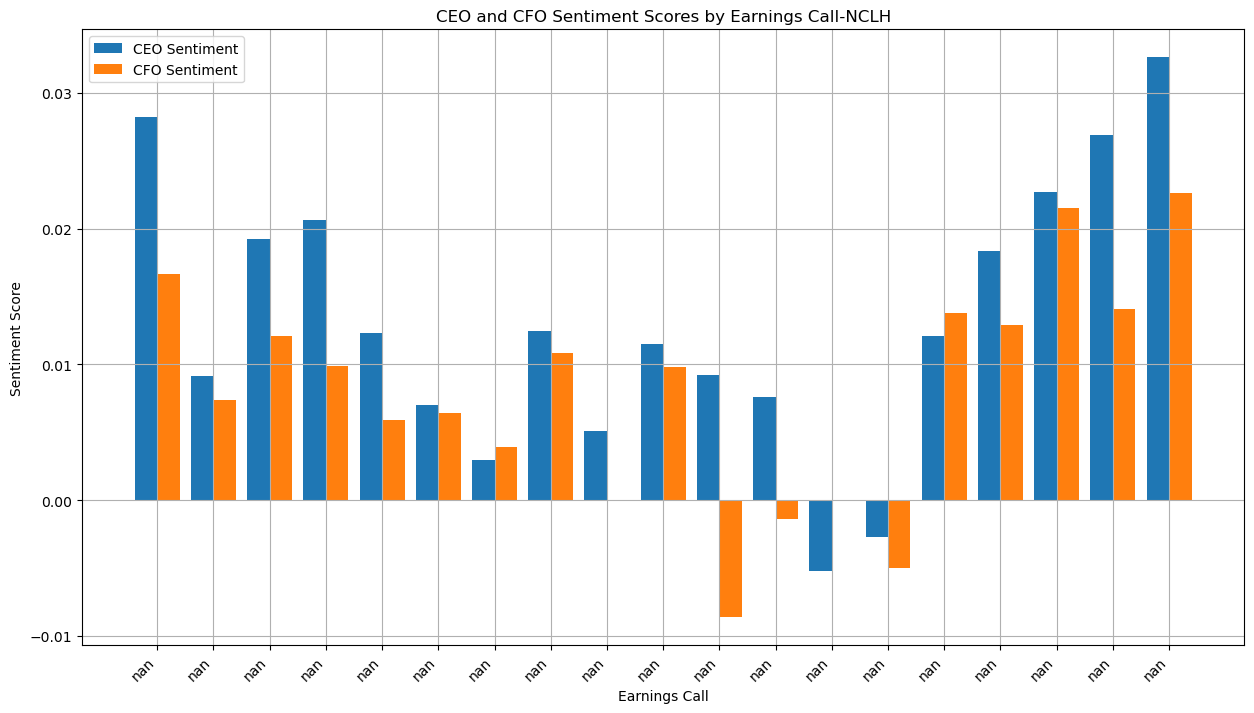

In [22]:
# Extracting relevant part from the 'Title'
df_lm_nclh['Earnings Call'] = df_lm_nclh['Title'].str.extract(r'\(RCL\) (.*?) Earnings')

plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

# Plotting bar chart
x = range(len(df_lm_nclh))
plt.bar([a - 0.2 for a in x], df_lm_nclh['CEO Sentiment Score'], width=0.4, label='CEO Sentiment', align='center')
plt.bar([a + 0.2 for a in x], df_lm_nclh['CFO Sentiment Score'], width=0.4, label='CFO Sentiment', align='center')

# Formatting the plot
plt.xlabel('Earnings Call')
plt.ylabel('Sentiment Score')
plt.title('CEO and CFO Sentiment Scores by Earnings Call-NCLH')
plt.xticks(x, df_lm_nclh['Earnings Call'], rotation=45, ha='right')  # Use the extracted part for x-axis labels
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

14th March 2020: CDC Issues No Sail Order
15th March 2022: CDC Drops cruise health travel warning notice 

source: https://cruiseindustrynews.com/cruise-news/2022/08/cdc-cruise-ship-timeline-from-no-sail-to-the-end-of-covid-19-program/

# COVID Timelines

--------

In [22]:
from datetime import datetime
import pandas as pd

# Defining the date ranges
pre_covid = (datetime(2018, 6, 1), datetime(2020, 3, 14))
covid_lockdowns = (datetime(2020, 3, 14), datetime(2022, 3, 15))
post_covid = (datetime(2022, 3, 15), datetime.now())

# Creating a DataFrame to hold these periods
covid_periods_df = pd.DataFrame({
    'Period': ['Pre-COVID', 'COVID Lockdowns', 'Post-COVID'],
    'Start Date': [pre_covid[0], covid_lockdowns[0], post_covid[0]],
    'End Date': [pre_covid[1], covid_lockdowns[1], post_covid[1]]
})

covid_periods_df



Period Start Date                   End Date
0        Pre-COVID 2018-06-01 2020-03-14 00:00:00.000000
1  COVID Lockdowns 2020-03-14 2022-03-15 00:00:00.000000
2       Post-COVID 2022-03-15 2024-03-15 16:02:08.742965

## Plot of sentiment scores difference between CEO and CFO for RCL

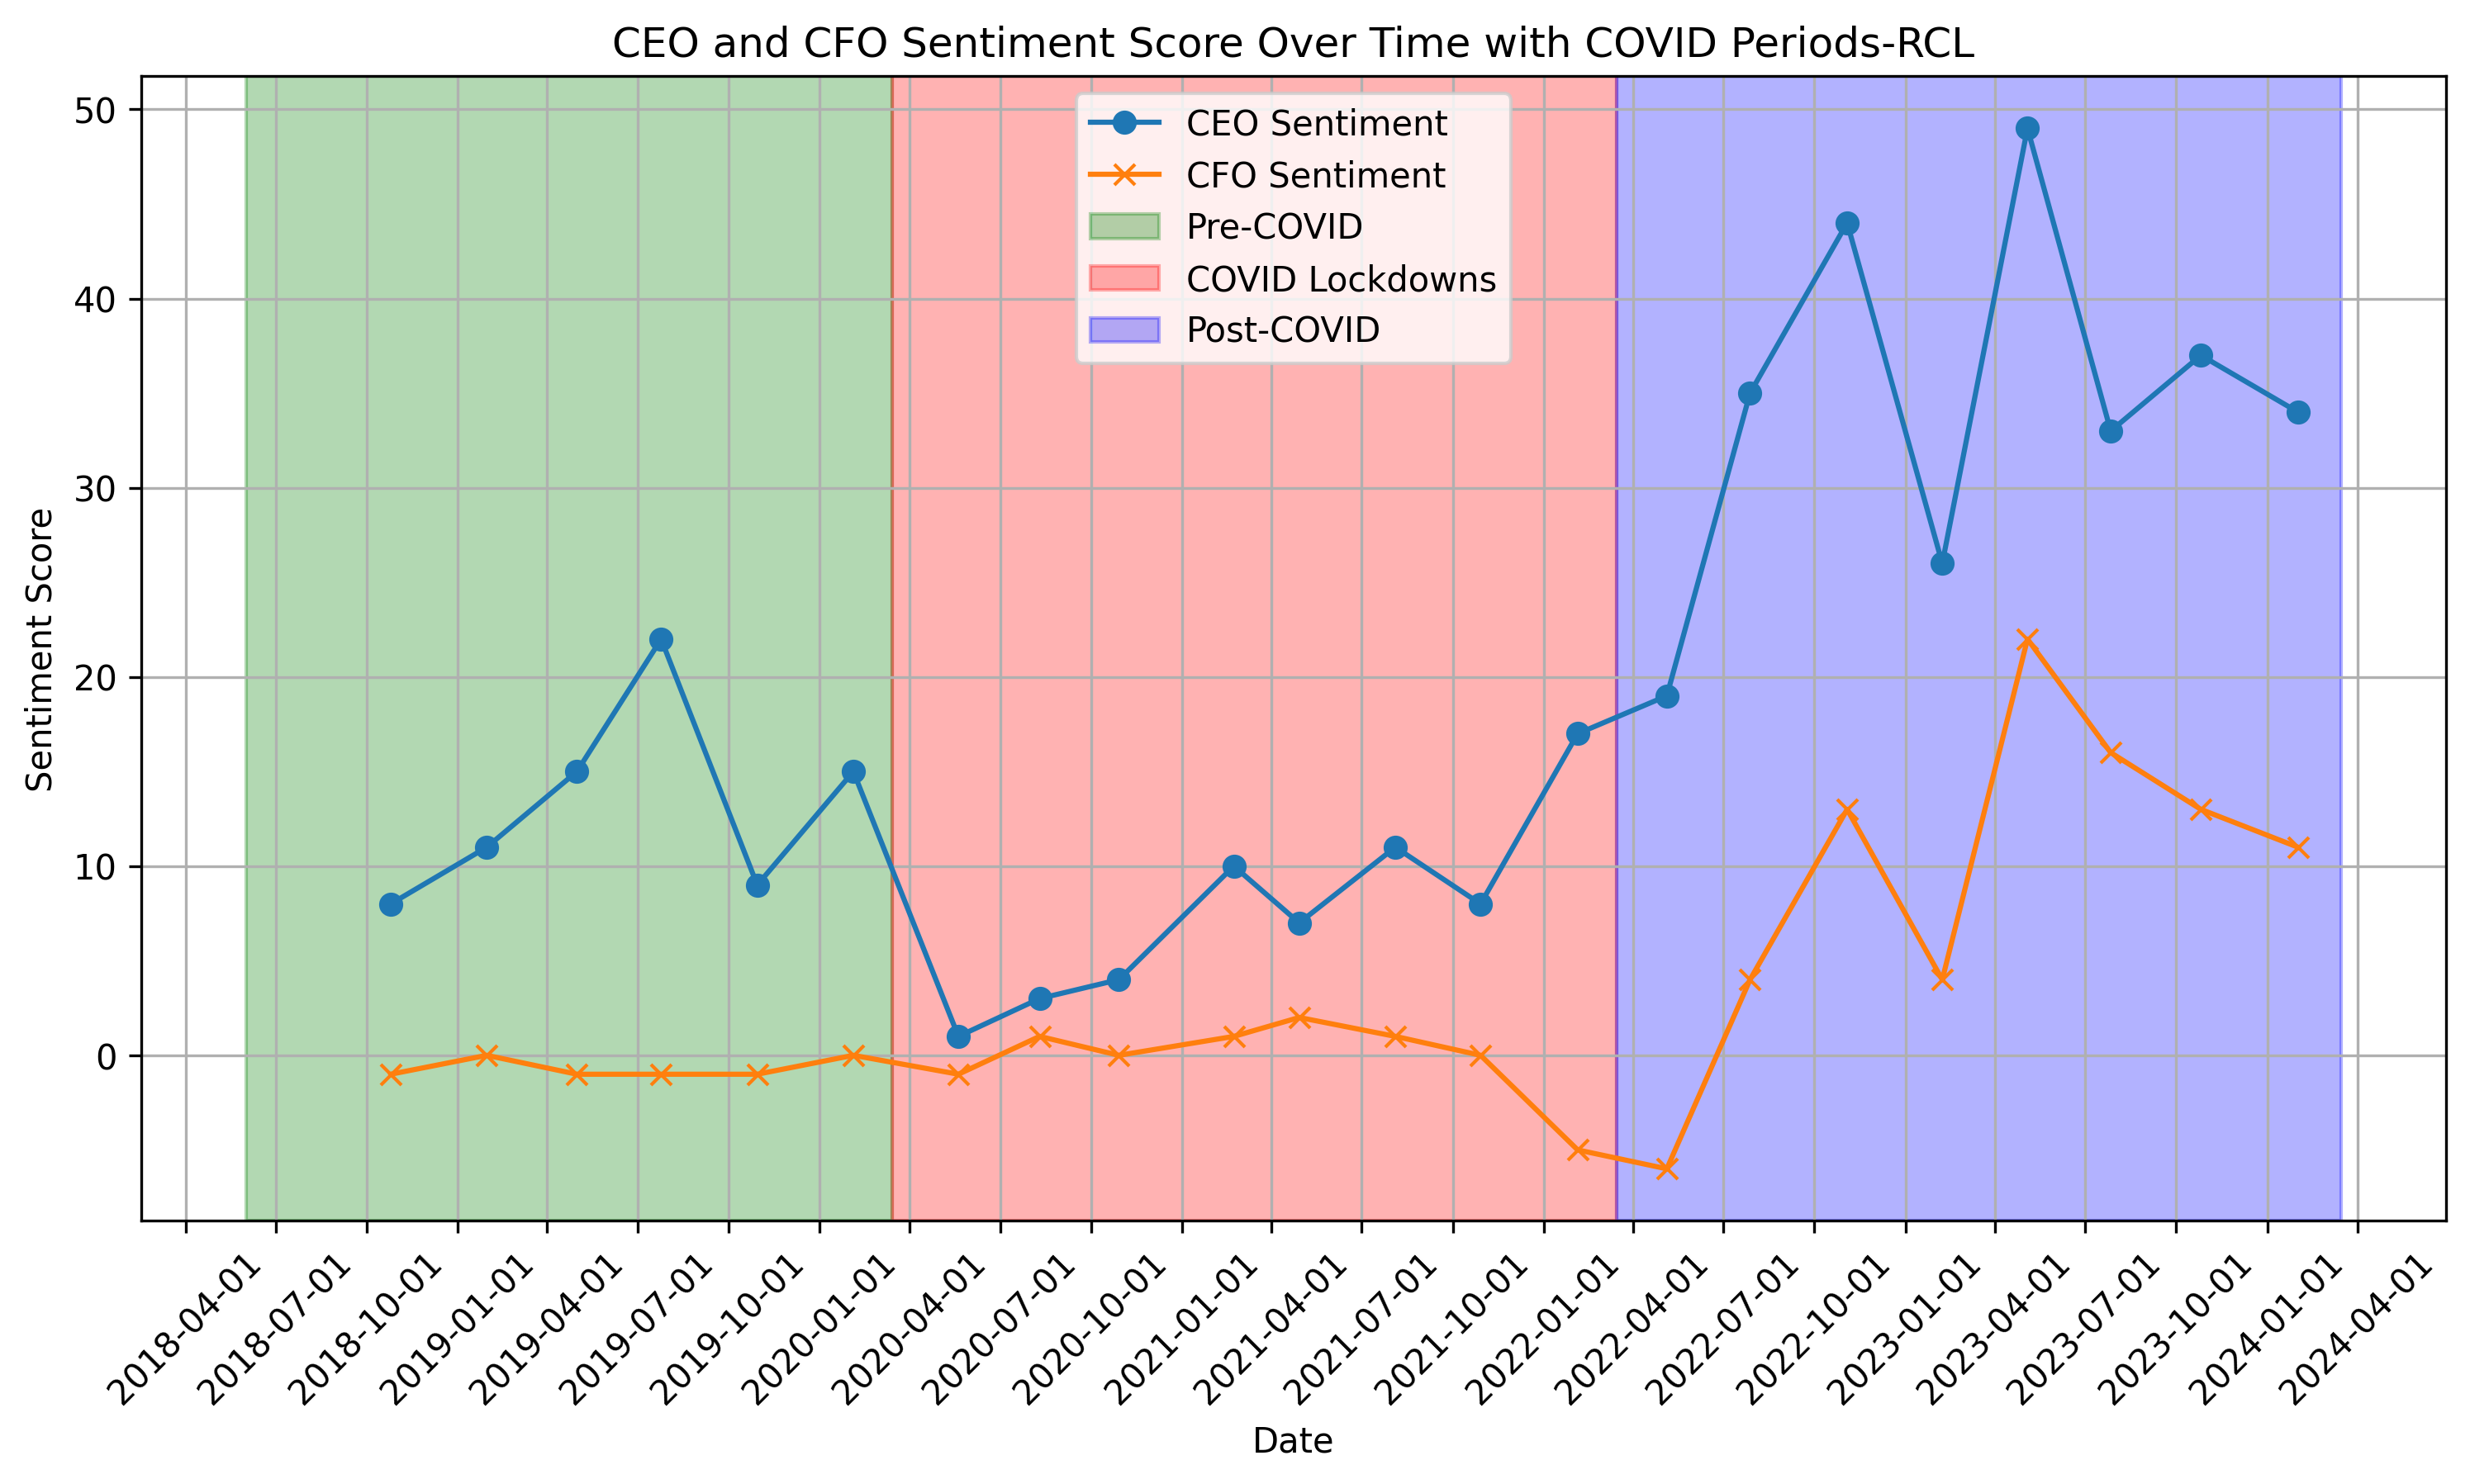

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming df_lm is already loaded

# Convert 'Date' to datetime and sort the DataFrame by 'Date'
df_lm_rcl['Date'] = pd.to_datetime(df_lm_rcl['Date'], errors='coerce')
df_lm_rcl.dropna(subset=['Date'], inplace=True)
df_lm_rcl.sort_values('Date', inplace=True)

# Plotting
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(df_lm_rcl['Date'], df_lm_rcl['CEO Sentiment Score'], label='CEO Sentiment', linestyle='-', marker='o')
plt.plot(df_lm_rcl['Date'], df_lm_rcl['CFO Sentiment Score'], label='CFO Sentiment', linestyle='-', marker='x')

# Adding background color for different periods using data from covid_periods_df
for index, row in covid_periods_df.iterrows():
    plt.axvspan(row['Start Date'], row['End Date'], color=['green', 'red', 'blue'][index], alpha=0.3, label=row['Period'])

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('CEO and CFO Sentiment Score Over Time with COVID Periods-RCL')
plt.legend()
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Show the plot
plt.show()


## Plot of sentiment scores difference between CEO and CFO for NCLH

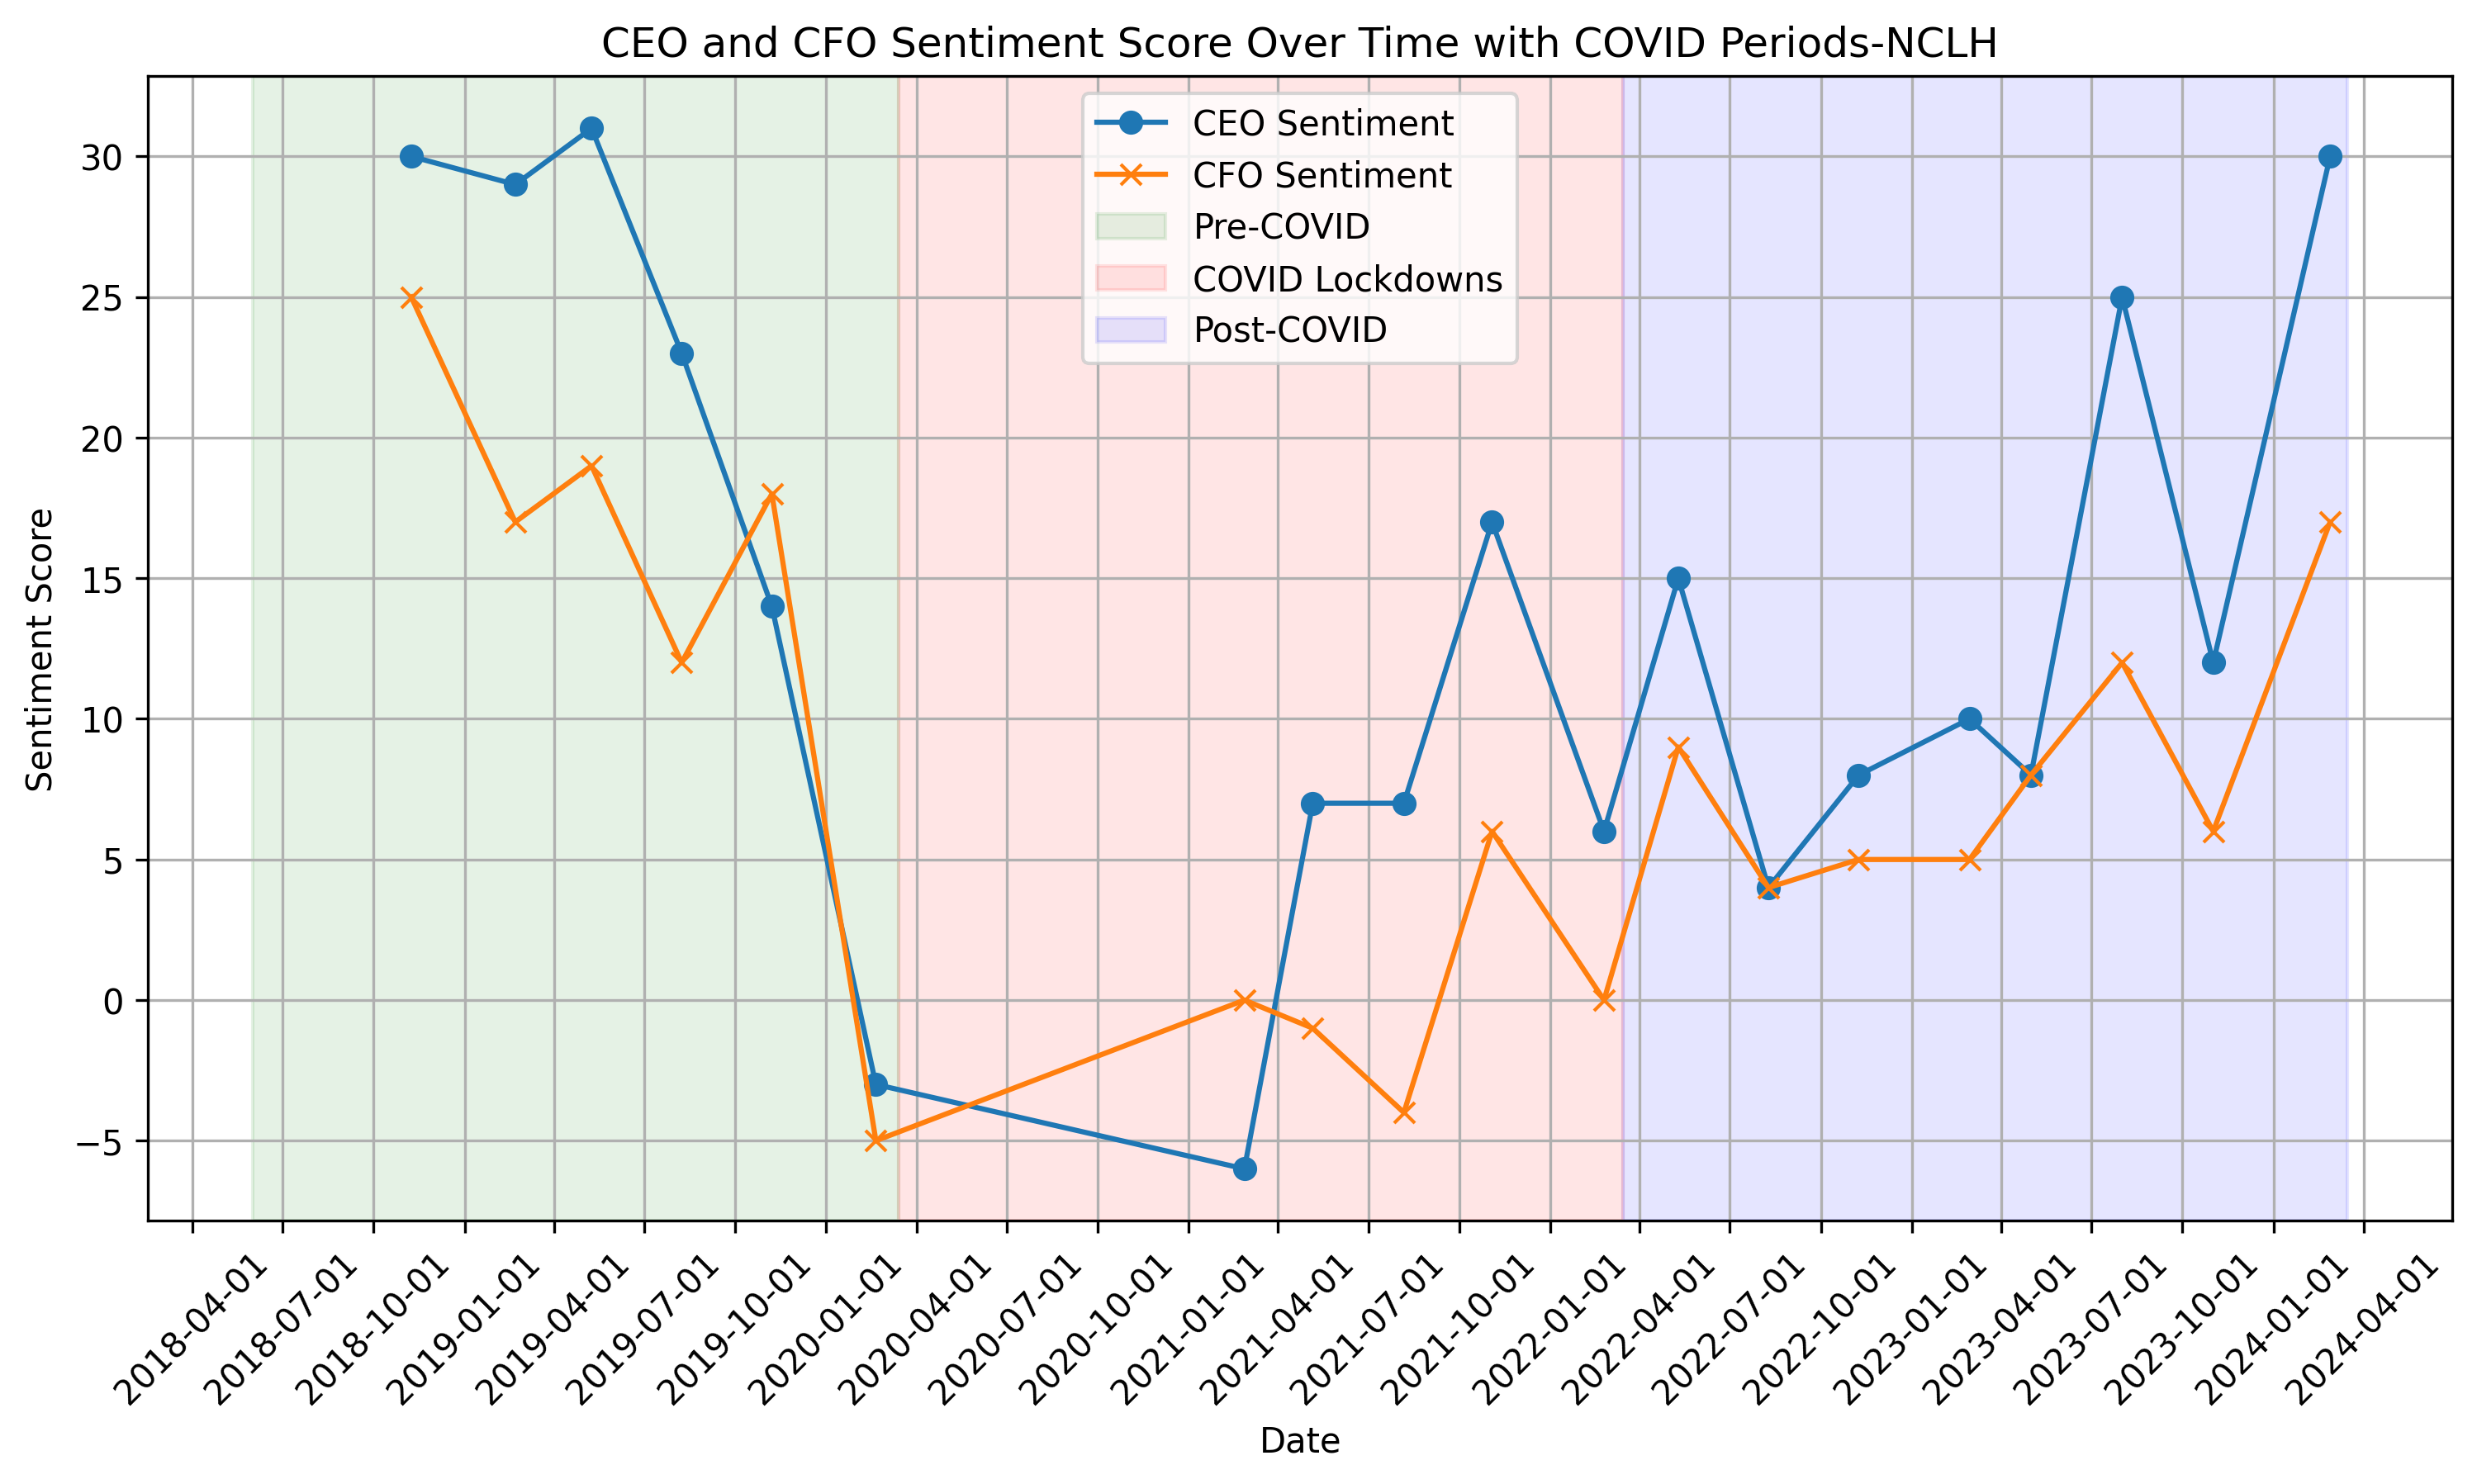

In [24]:
# Convert 'Date' to datetime and sort the DataFrame by 'Date'
df_lm_nclh['Date'] = pd.to_datetime(df_lm_nclh['Date'], errors='coerce')
df_lm_nclh.dropna(subset=['Date'], inplace=True)
df_lm_nclh.sort_values('Date', inplace=True)

# Plotting
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(df_lm_nclh['Date'], df_lm_nclh['CEO Sentiment Score'], label='CEO Sentiment', linestyle='-', marker='o')
plt.plot(df_lm_nclh['Date'], df_lm_nclh['CFO Sentiment Score'], label='CFO Sentiment', linestyle='-', marker='x')

# Adding background color for different periods using data from covid_periods_df
for index, row in covid_periods_df.iterrows():
    plt.axvspan(row['Start Date'], row['End Date'], color=['green', 'red', 'blue'][index], alpha=0.1, label=row['Period'])

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('CEO and CFO Sentiment Score Over Time with COVID Periods-NCLH')
plt.legend()
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Show the plot
plt.show()


## Plot of sentiment scores difference between CEO and CFO for DAL

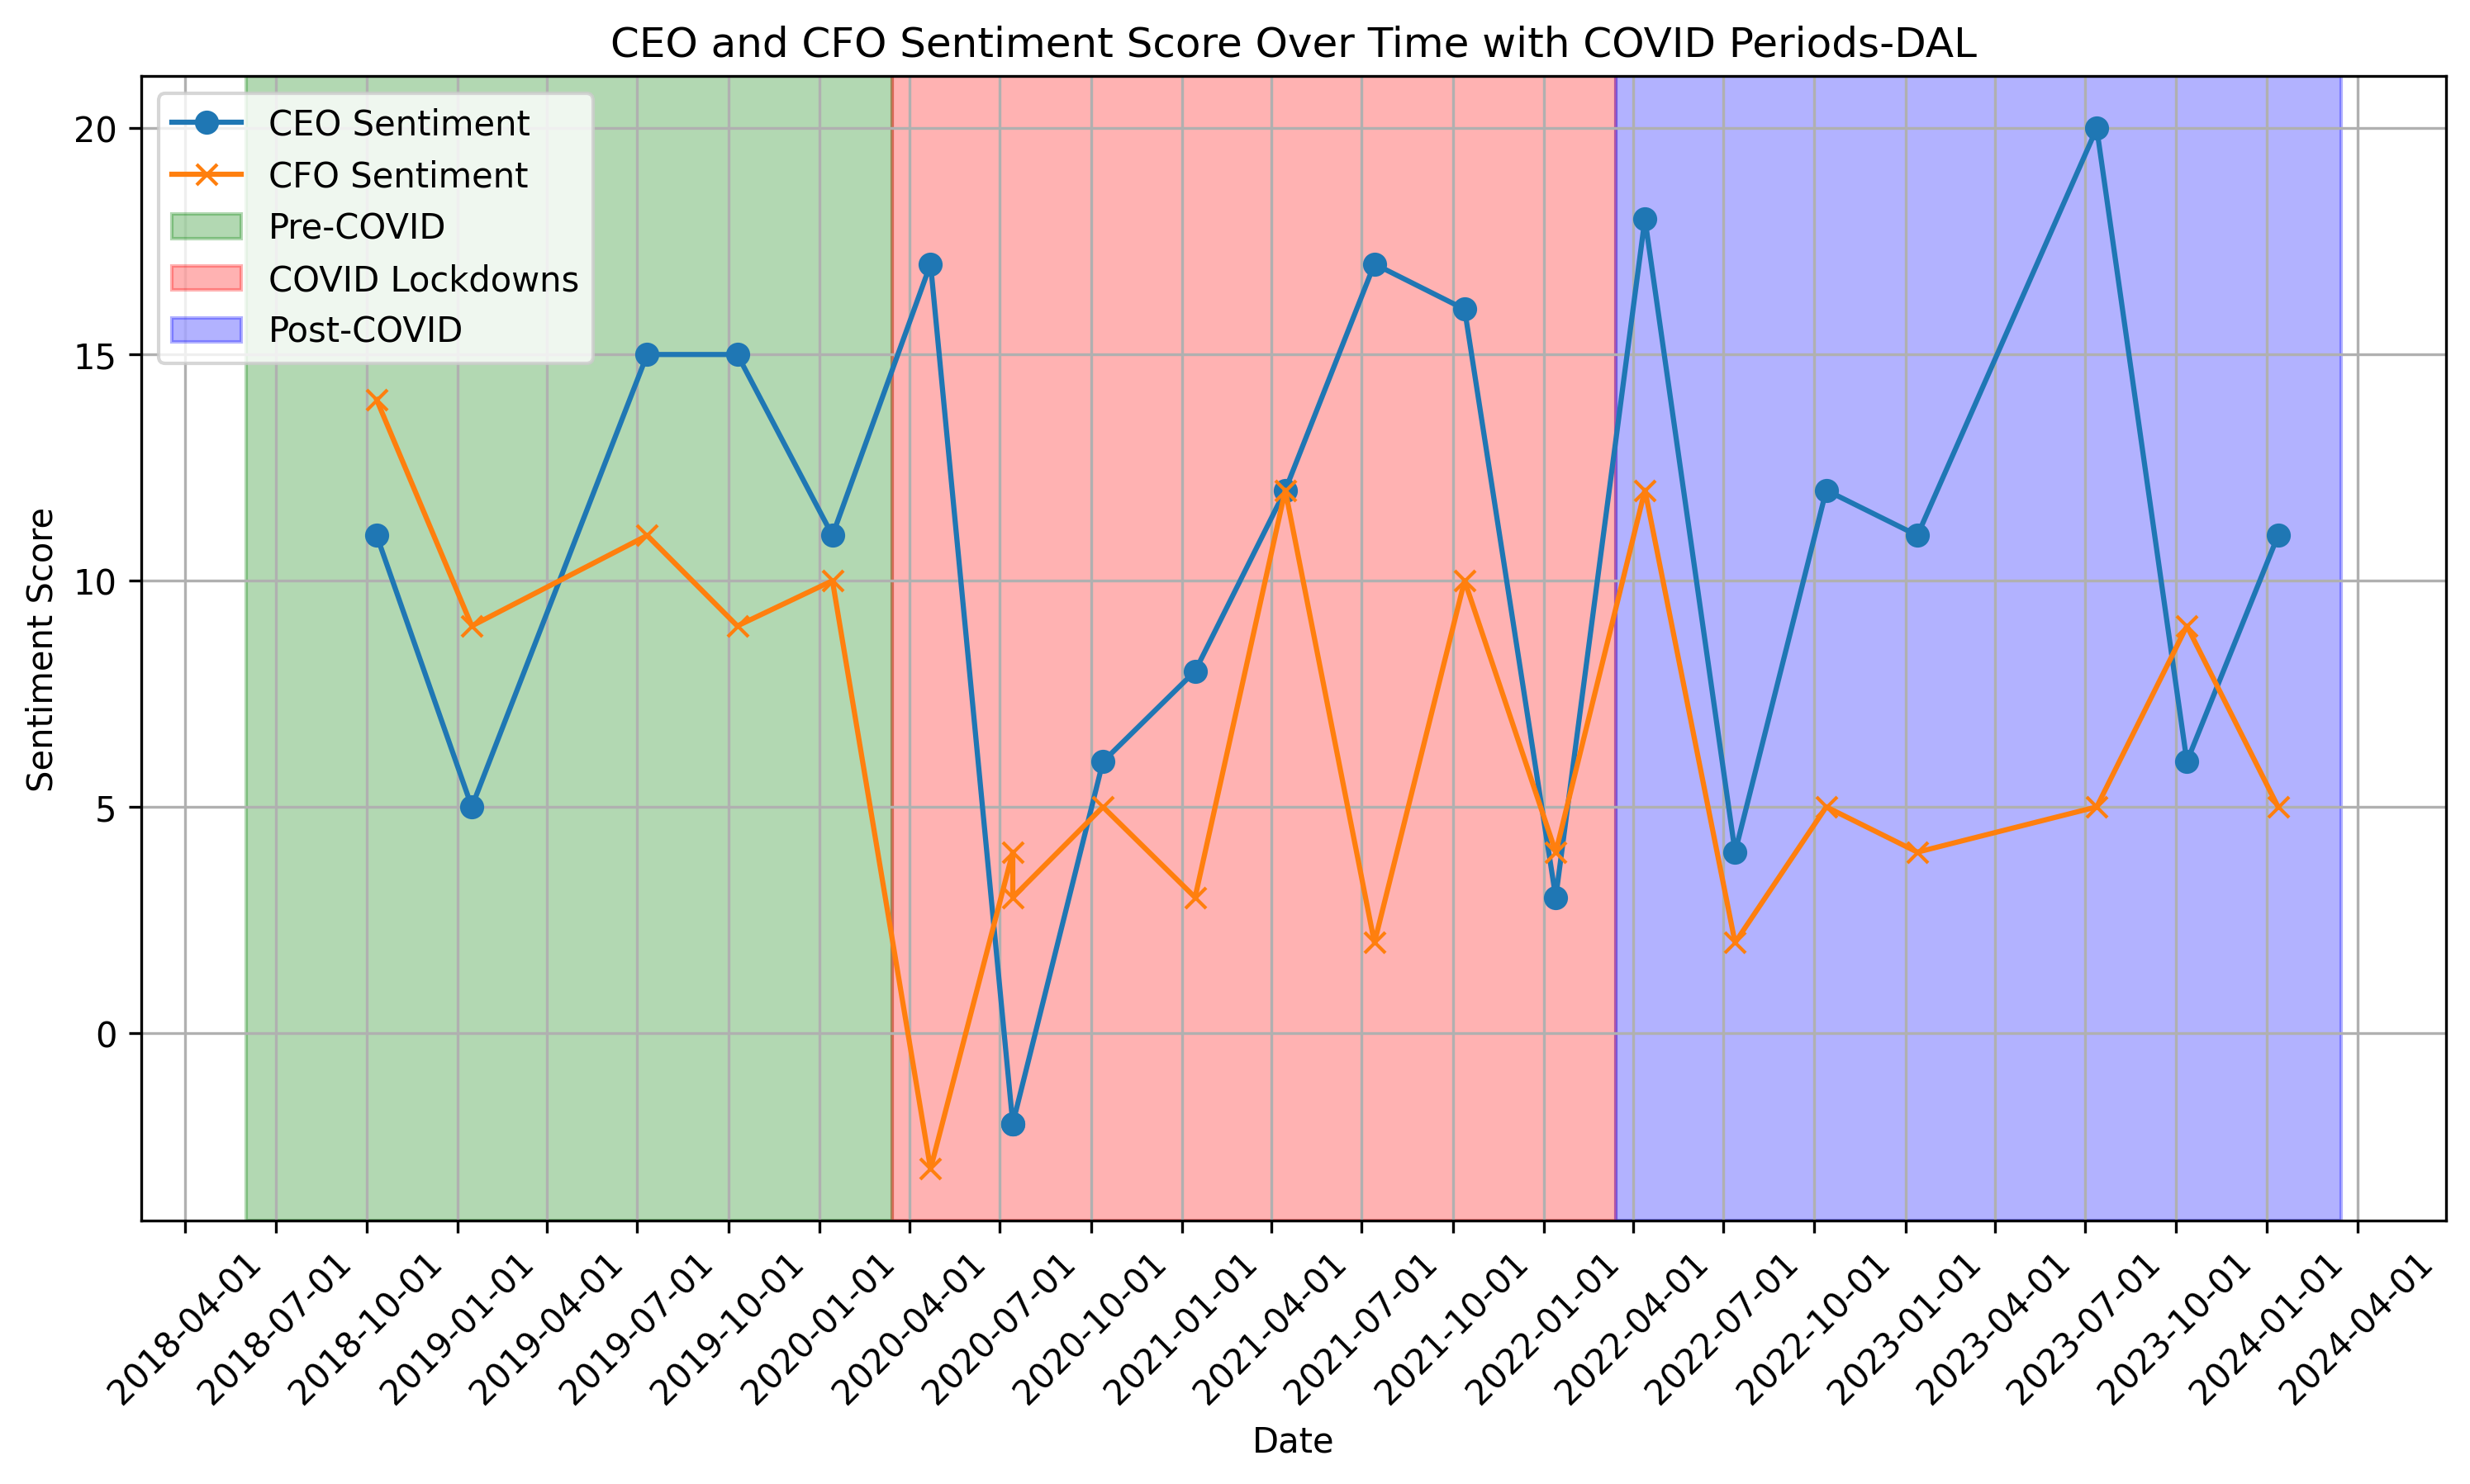

In [25]:
# Convert 'Date' to datetime and sort the DataFrame by 'Date'
df_lm_dal['Date'] = pd.to_datetime(df_lm_dal['Date'], errors='coerce')
df_lm_dal.dropna(subset=['Date'], inplace=True)
df_lm_dal.sort_values('Date', inplace=True)

# Plotting
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(df_lm_dal['Date'], df_lm_dal['CEO Sentiment Score'], label='CEO Sentiment', linestyle='-', marker='o')
plt.plot(df_lm_dal['Date'], df_lm_dal['CFO Sentiment Score'], label='CFO Sentiment', linestyle='-', marker='x')

# Adding background color for different periods using data from covid_periods_df
for index, row in covid_periods_df.iterrows():
    plt.axvspan(row['Start Date'], row['End Date'], color=['green', 'red', 'blue'][index], alpha=0.3, label=row['Period'])

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('CEO and CFO Sentiment Score Over Time with COVID Periods-DAL')
plt.legend()
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Show the plot
plt.show()


## Plot of sentiment scores difference between CEO and CFO for LUV

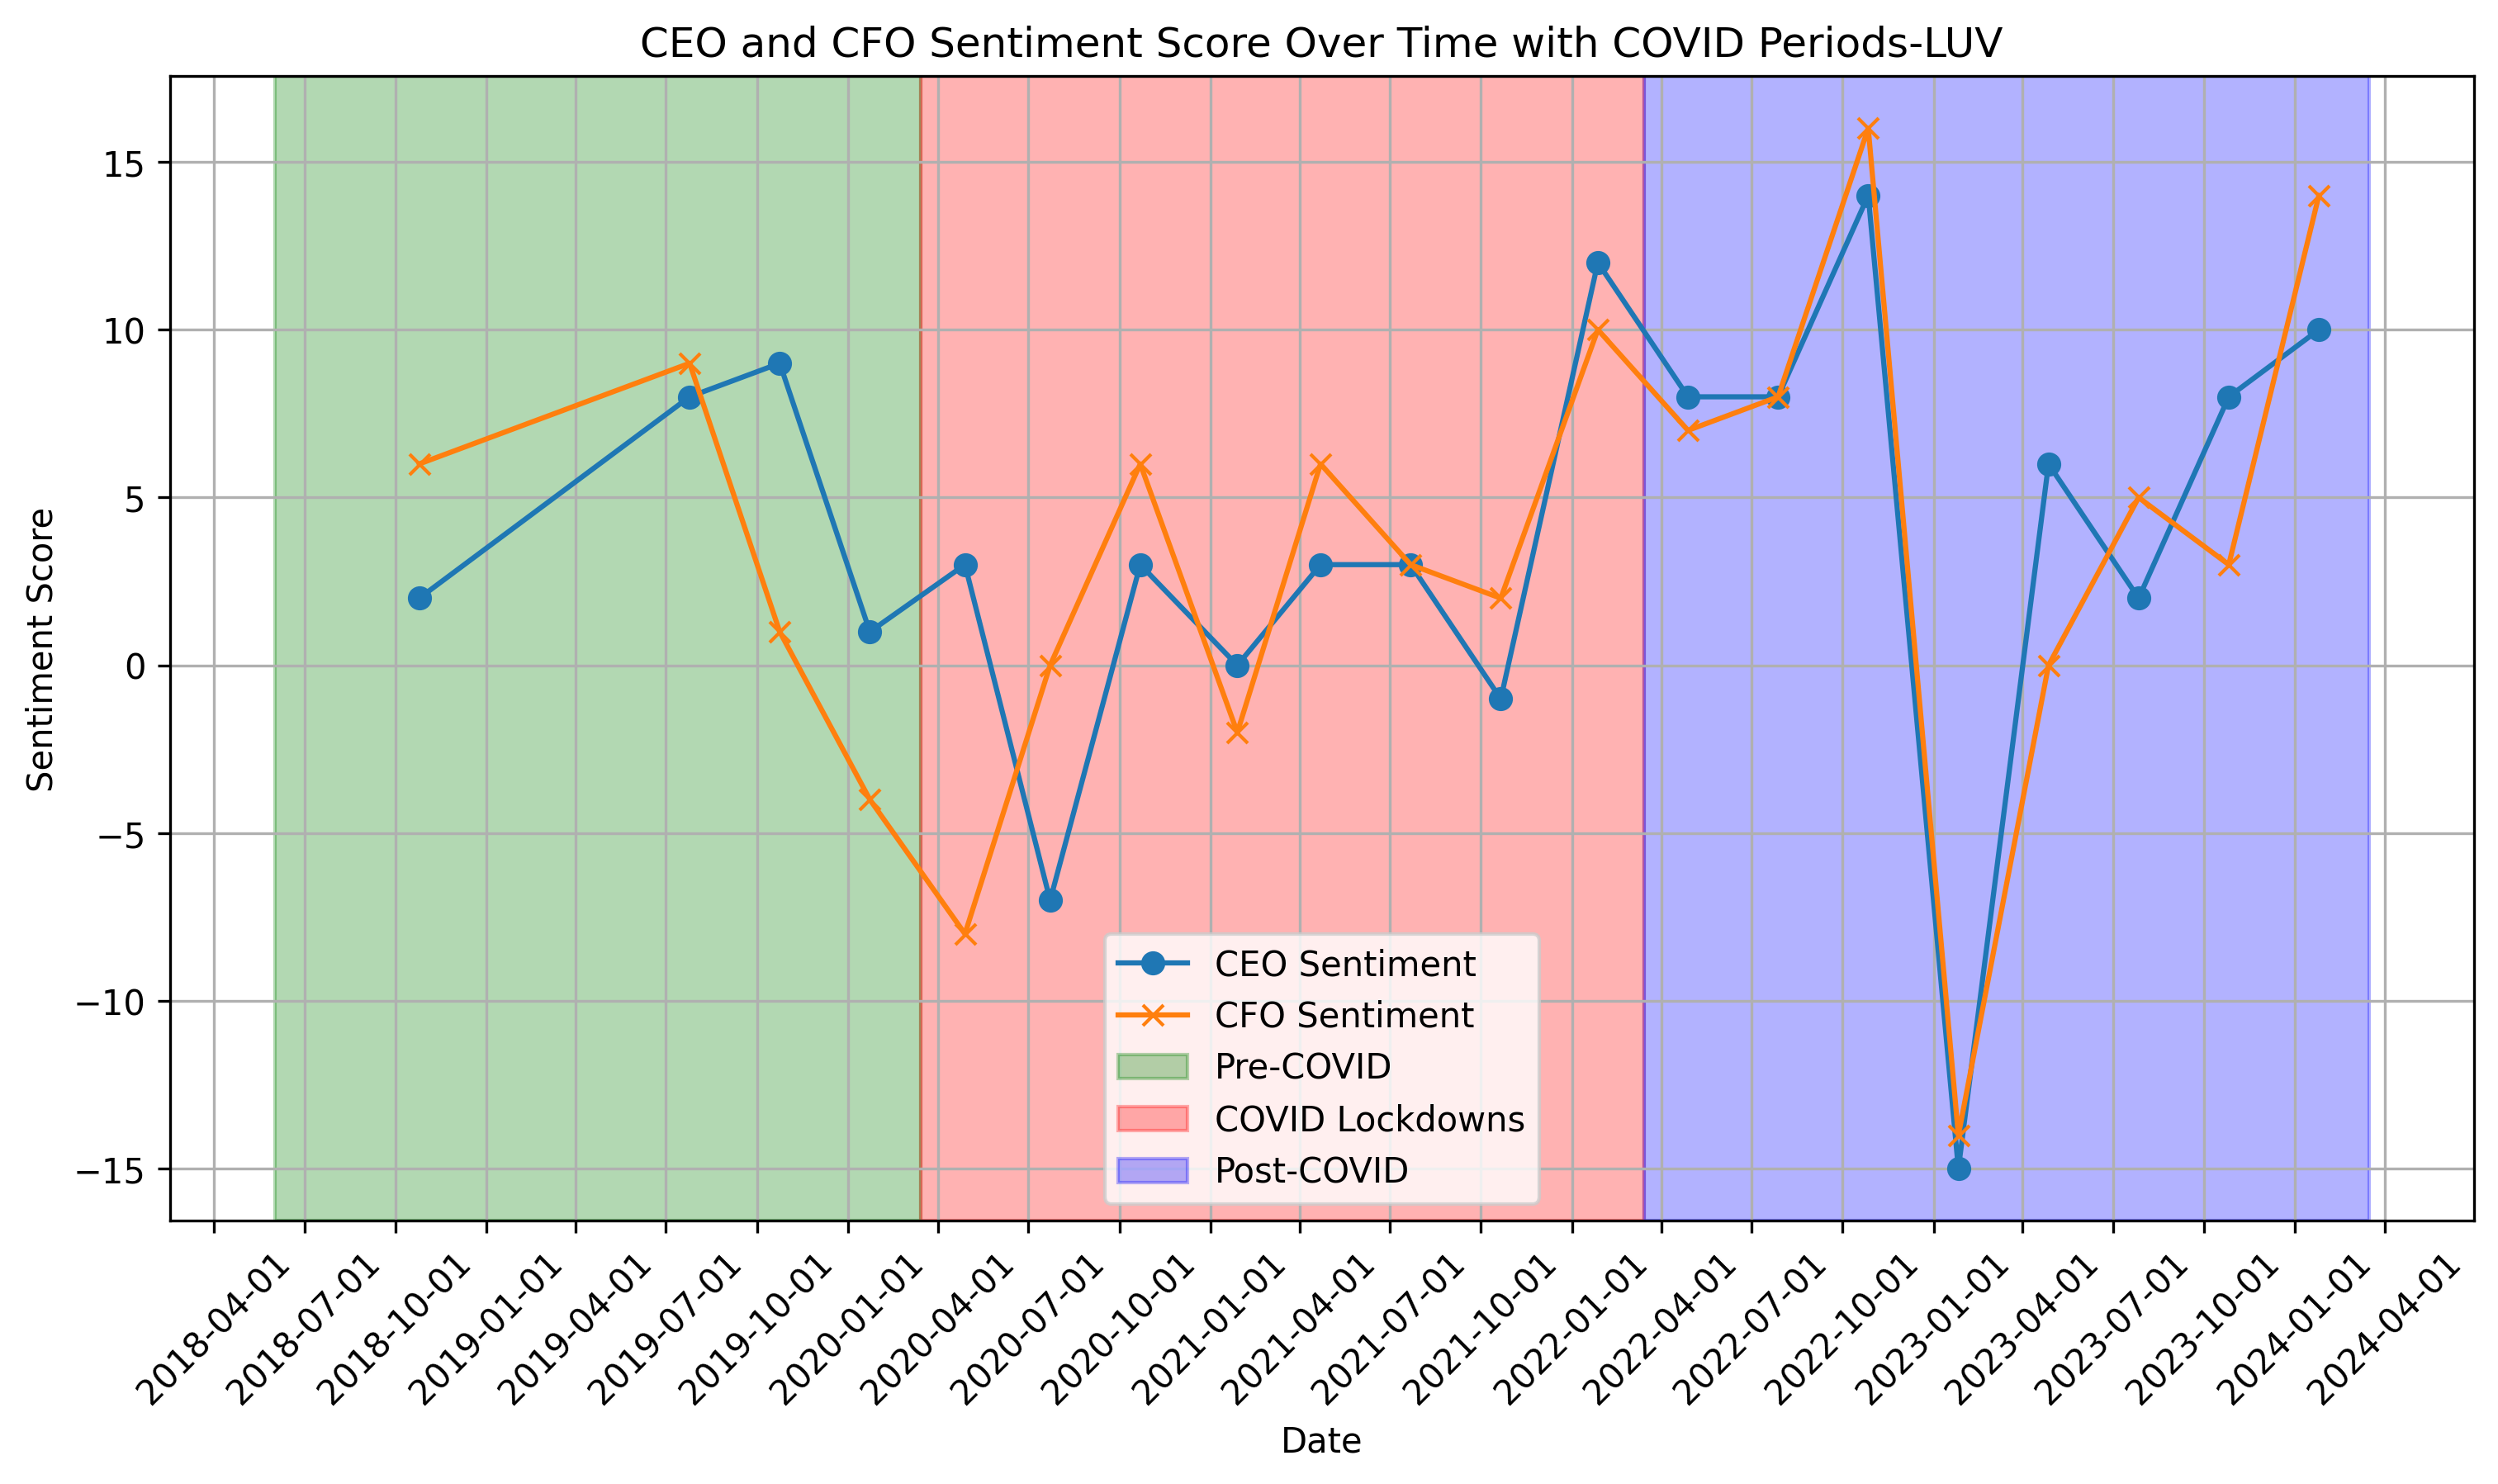

In [26]:
# Convert 'Date' to datetime and sort the DataFrame by 'Date'
df_lm_luv['Date'] = pd.to_datetime(df_lm_luv['Date'], errors='coerce')
df_lm_luv.dropna(subset=['Date'], inplace=True)
df_lm_luv.sort_values('Date', inplace=True)

# Plotting
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(df_lm_luv['Date'], df_lm_luv['CEO Sentiment Score'], label='CEO Sentiment', linestyle='-', marker='o')
plt.plot(df_lm_luv['Date'], df_lm_luv['CFO Sentiment Score'], label='CFO Sentiment', linestyle='-', marker='x')

# Adding background color for different periods using data from covid_periods_df
for index, row in covid_periods_df.iterrows():
    plt.axvspan(row['Start Date'], row['End Date'], color=['green', 'red', 'blue'][index], alpha=0.3, label=row['Period'])

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('CEO and CFO Sentiment Score Over Time with COVID Periods-LUV')
plt.legend()
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Show the plot
plt.show()

Defining the date ranges of Covid 19

In [27]:
# Defining the date ranges
pre_covid = (datetime(2018, 6, 1), datetime(2020, 3, 14))
covid_lockdowns = (datetime(2020, 3, 14), datetime(2022, 3, 15))
post_covid = (datetime(2022, 3, 15), datetime.now())

# Printing the defined date ranges
print("Pre-COVID Period: ", pre_covid)
print("COVID Lockdowns Period: ", covid_lockdowns)
print("Post-COVID Period: ", post_covid)


Pre-COVID Period:  (datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2020, 3, 14, 0, 0))
COVID Lockdowns Period:  (datetime.datetime(2020, 3, 14, 0, 0), datetime.datetime(2022, 3, 15, 0, 0))
Post-COVID Period:  (datetime.datetime(2022, 3, 15, 0, 0), datetime.datetime(2024, 3, 15, 16, 2, 10, 145583))


# Add Financial Data to Plots
----------

In [28]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

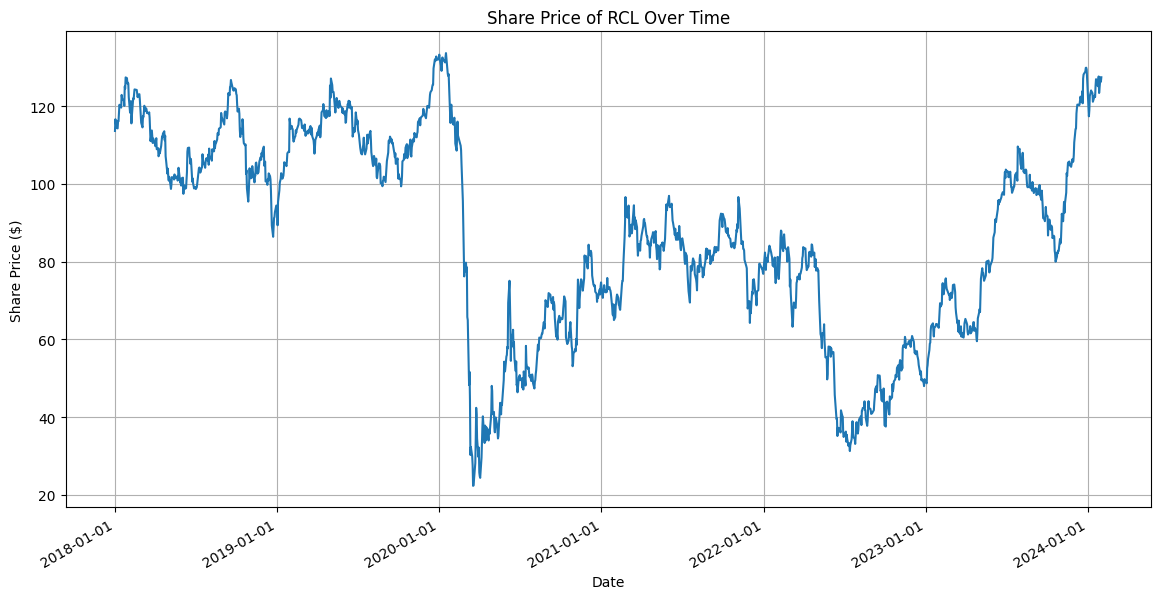

In [29]:
# Define the ticker symbol for Norwegian Cruise Line Holdings Ltd.
ticker_symbol = 'RCL'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Define the start and end dates for the time period you're interested in.
start_date = '2018-01-01'
end_date = '2024-02-01'

# Get the historical prices for this ticker within the specified time frame
rcl_df = ticker_data.history(start=start_date, end=end_date)

# Reset the index to make 'Date' a column
rcl_df.reset_index(inplace=True)

# Convert 'Date' to just a date format without the time
rcl_df['Date'] = pd.to_datetime(rcl_df['Date']).dt.date

# Select only the 'Date' and 'Close' columns
nrcl_share_price_df = rcl_df[['Date', 'Close']]

# Rename 'Close' to 'Share Price' for clarity
nrcl_share_price_df.rename(columns={'Close': 'Share Price'}, inplace=True)


# Plotting the share price data
plt.figure(figsize=(14, 7))
plt.plot_date(nrcl_share_price_df['Date'], nrcl_share_price_df['Share Price'], linestyle='solid', marker=None)

# Formatting the plot
plt.title('Share Price of RCL Over Time')
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Shows each year on the x-axis
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Show the plot
plt.show()


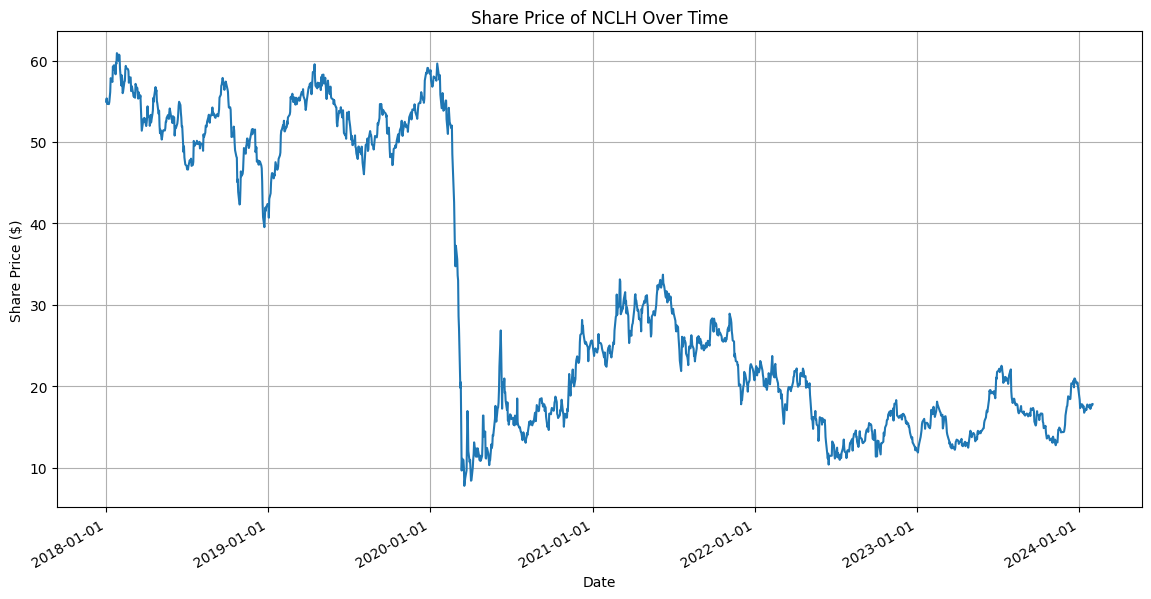

In [30]:
# Define the ticker symbol for Norwegian Cruise Line Holdings Ltd.
ticker_symbol = 'NCLH'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Define the start and end dates for the time period you're interested in.
start_date = '2018-01-01'
end_date = '2024-02-01'

# Get the historical prices for this ticker within the specified time frame
nclh_df = ticker_data.history(start=start_date, end=end_date)

# Reset the index to make 'Date' a column
nclh_df.reset_index(inplace=True)

# Convert 'Date' to just a date format without the time
nclh_df['Date'] = pd.to_datetime(nclh_df['Date']).dt.date

# Select only the 'Date' and 'Close' columns
nclh_share_price_df = nclh_df[['Date', 'Close']]

# Rename 'Close' to 'Share Price' for clarity
nclh_share_price_df.rename(columns={'Close': 'Share Price'}, inplace=True)

# Plotting the share price data
plt.figure(figsize=(14, 7))
plt.plot_date(nclh_share_price_df['Date'], nclh_share_price_df['Share Price'], linestyle='solid', marker=None)

# Formatting the plot
plt.title('Share Price of NCLH Over Time')
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()


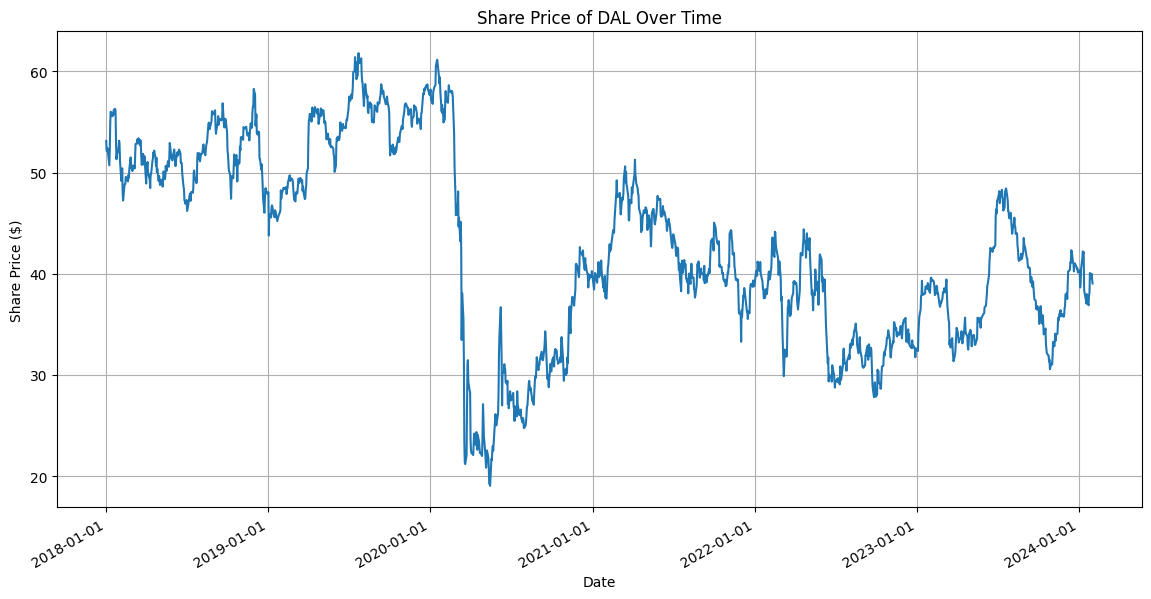

In [31]:
# Define the ticker symbol for Norwegian Cruise Line Holdings Ltd.
ticker_symbol = 'DAL'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Define the start and end dates for the time period you're interested in.
start_date = '2018-01-01'
end_date = '2024-02-01'

# Get the historical prices for this ticker within the specified time frame
dal_df = ticker_data.history(start=start_date, end=end_date)

# Reset the index to make 'Date' a column
dal_df.reset_index(inplace=True)

# Convert 'Date' to just a date format without the time
dal_df['Date'] = pd.to_datetime(dal_df['Date']).dt.date

# Select only the 'Date' and 'Close' columns
dal_share_price_df = dal_df[['Date', 'Close']]

# Rename 'Close' to 'Share Price' for clarity
dal_share_price_df.rename(columns={'Close': 'Share Price'}, inplace=True)

# Plotting the share price data
plt.figure(figsize=(14, 7))
plt.plot_date(dal_share_price_df['Date'], dal_share_price_df['Share Price'], linestyle='solid', marker=None)

# Formatting the plot
plt.title('Share Price of DAL Over Time')
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()


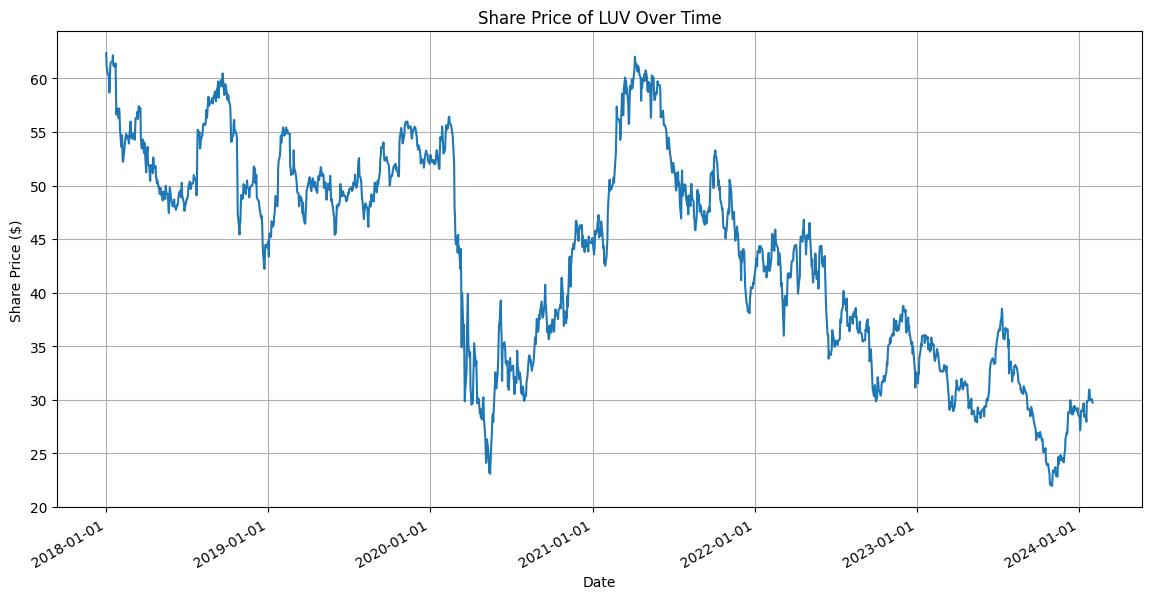

In [32]:
# Define the ticker symbol for Norwegian Cruise Line Holdings Ltd.
ticker_symbol = 'LUV'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Define the start and end dates for the time period you're interested in.
start_date = '2018-01-01'
end_date = '2024-02-01'

# Get the historical prices for this ticker within the specified time frame
luv_df = ticker_data.history(start=start_date, end=end_date)

# Reset the index to make 'Date' a column
luv_df.reset_index(inplace=True)

# Convert 'Date' to just a date format without the time
luv_df['Date'] = pd.to_datetime(luv_df['Date']).dt.date

# Select only the 'Date' and 'Close' columns
luv_share_price_df = luv_df[['Date', 'Close']]

# Rename 'Close' to 'Share Price' for clarity
luv_share_price_df.rename(columns={'Close': 'Share Price'}, inplace=True)


# Plotting the share price data
plt.figure(figsize=(14, 7))
plt.plot_date(luv_share_price_df['Date'], luv_share_price_df['Share Price'], linestyle='solid', marker=None)

# Formatting the plot
plt.title('Share Price of LUV Over Time')
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Shows each year on the x-axis
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Show the plot
plt.show()


## Plotting Volumns Traded

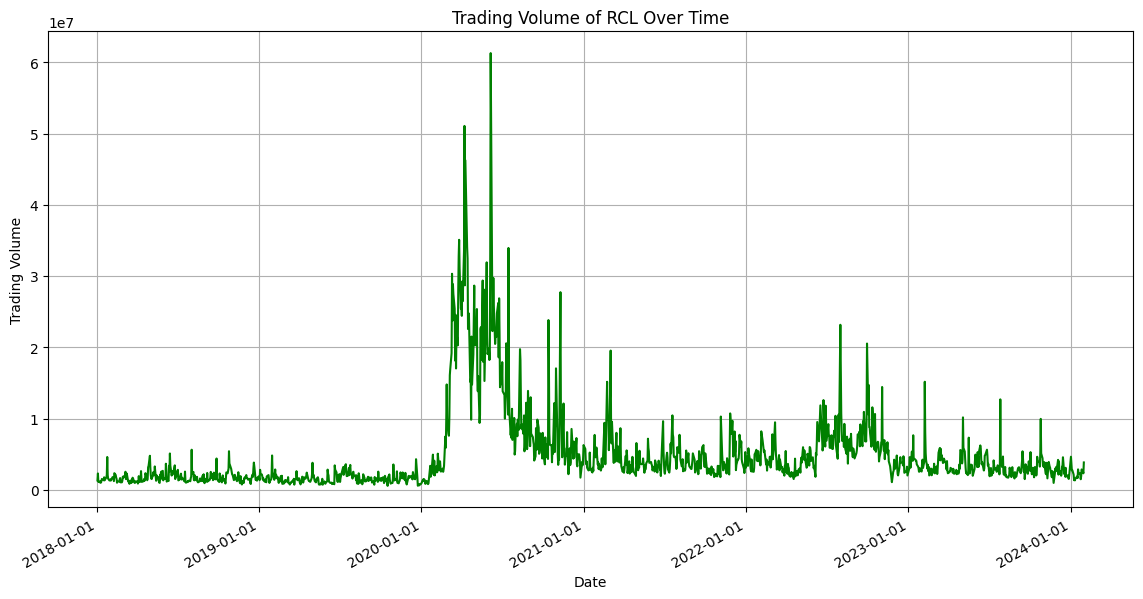

In [33]:
# Extracting the Trading Volume data
rcl_volume_df = rcl_df[['Date', 'Volume']]

# Plotting the trading volume data
plt.figure(figsize=(14, 7))
plt.plot_date(rcl_volume_df['Date'], rcl_volume_df['Volume'], linestyle='solid', marker=None, color='green')  # Use 'Volume'

# Formatting the plot
plt.title('Trading Volume of RCL Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Shows each year on the x-axis
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Show the plot
plt.show()


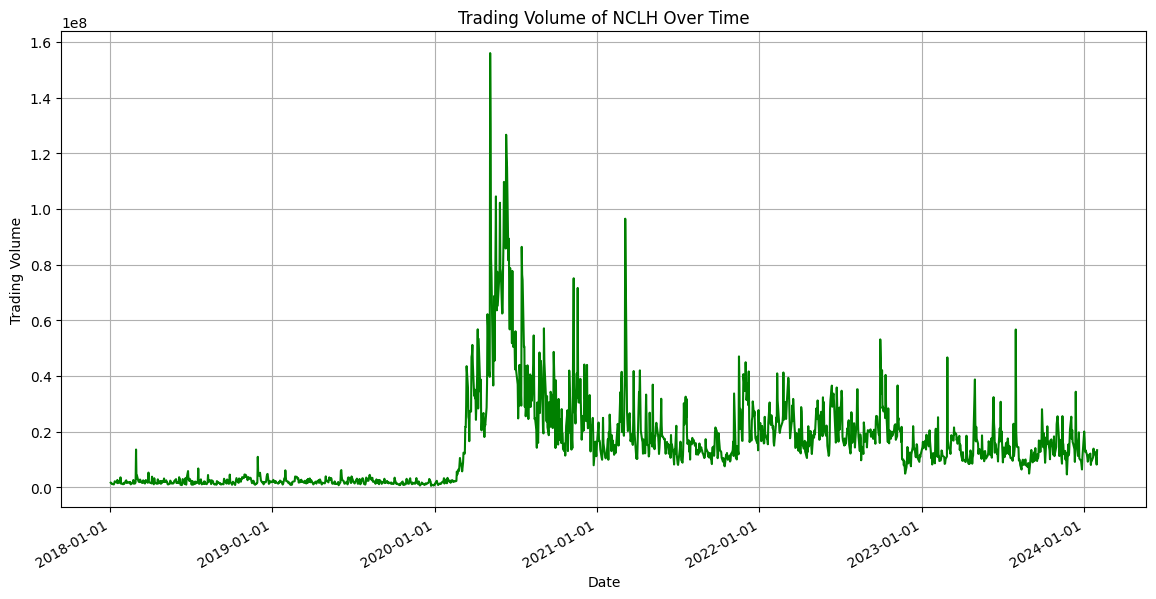

In [34]:
# Extracting the Trading Volume data
nclh_volume_df = nclh_df[['Date', 'Volume']]

# Plotting the trading volume data
plt.figure(figsize=(14, 7))
plt.plot_date(nclh_volume_df['Date'], nclh_volume_df['Volume'], linestyle='solid', marker=None, color='green')

# Formatting the plot
plt.title('Trading Volume of NCLH Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Show the plot
plt.show()


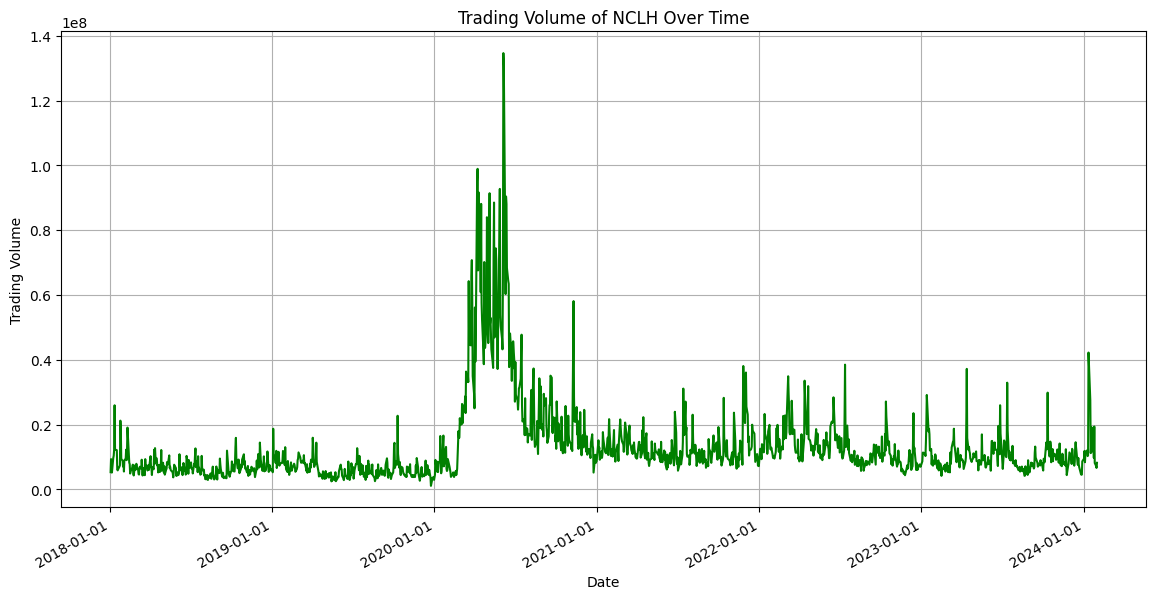

In [35]:
# Extracting the Trading Volume data
dal_volume_df = dal_df[['Date', 'Volume']]

# Plotting the trading volume data
plt.figure(figsize=(14, 7))
plt.plot_date(dal_volume_df['Date'], dal_volume_df['Volume'], linestyle='solid', marker=None, color='green')

# Formatting the plot
plt.title('Trading Volume of NCLH Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Show the plot
plt.show()


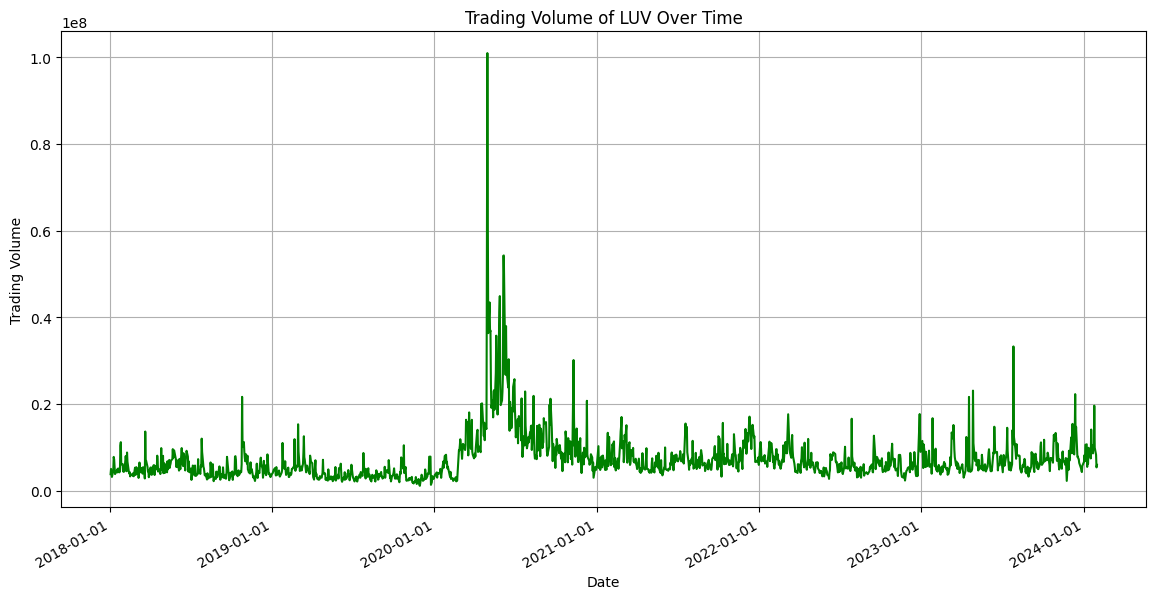

In [36]:
# Extracting the Trading Volume data
luv_volume_df = luv_df[['Date', 'Volume']]

# Plotting the trading volume data
plt.figure(figsize=(14, 7))
plt.plot_date(rcl_volume_df['Date'], luv_volume_df['Volume'], linestyle='solid', marker=None, color='green')  # Use 'Volume'

# Formatting the plot
plt.title('Trading Volume of LUV Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Shows each year on the x-axis
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Show the plot
plt.show()


## Final Vizualisation

NameError: name 'combined_df' is not defined

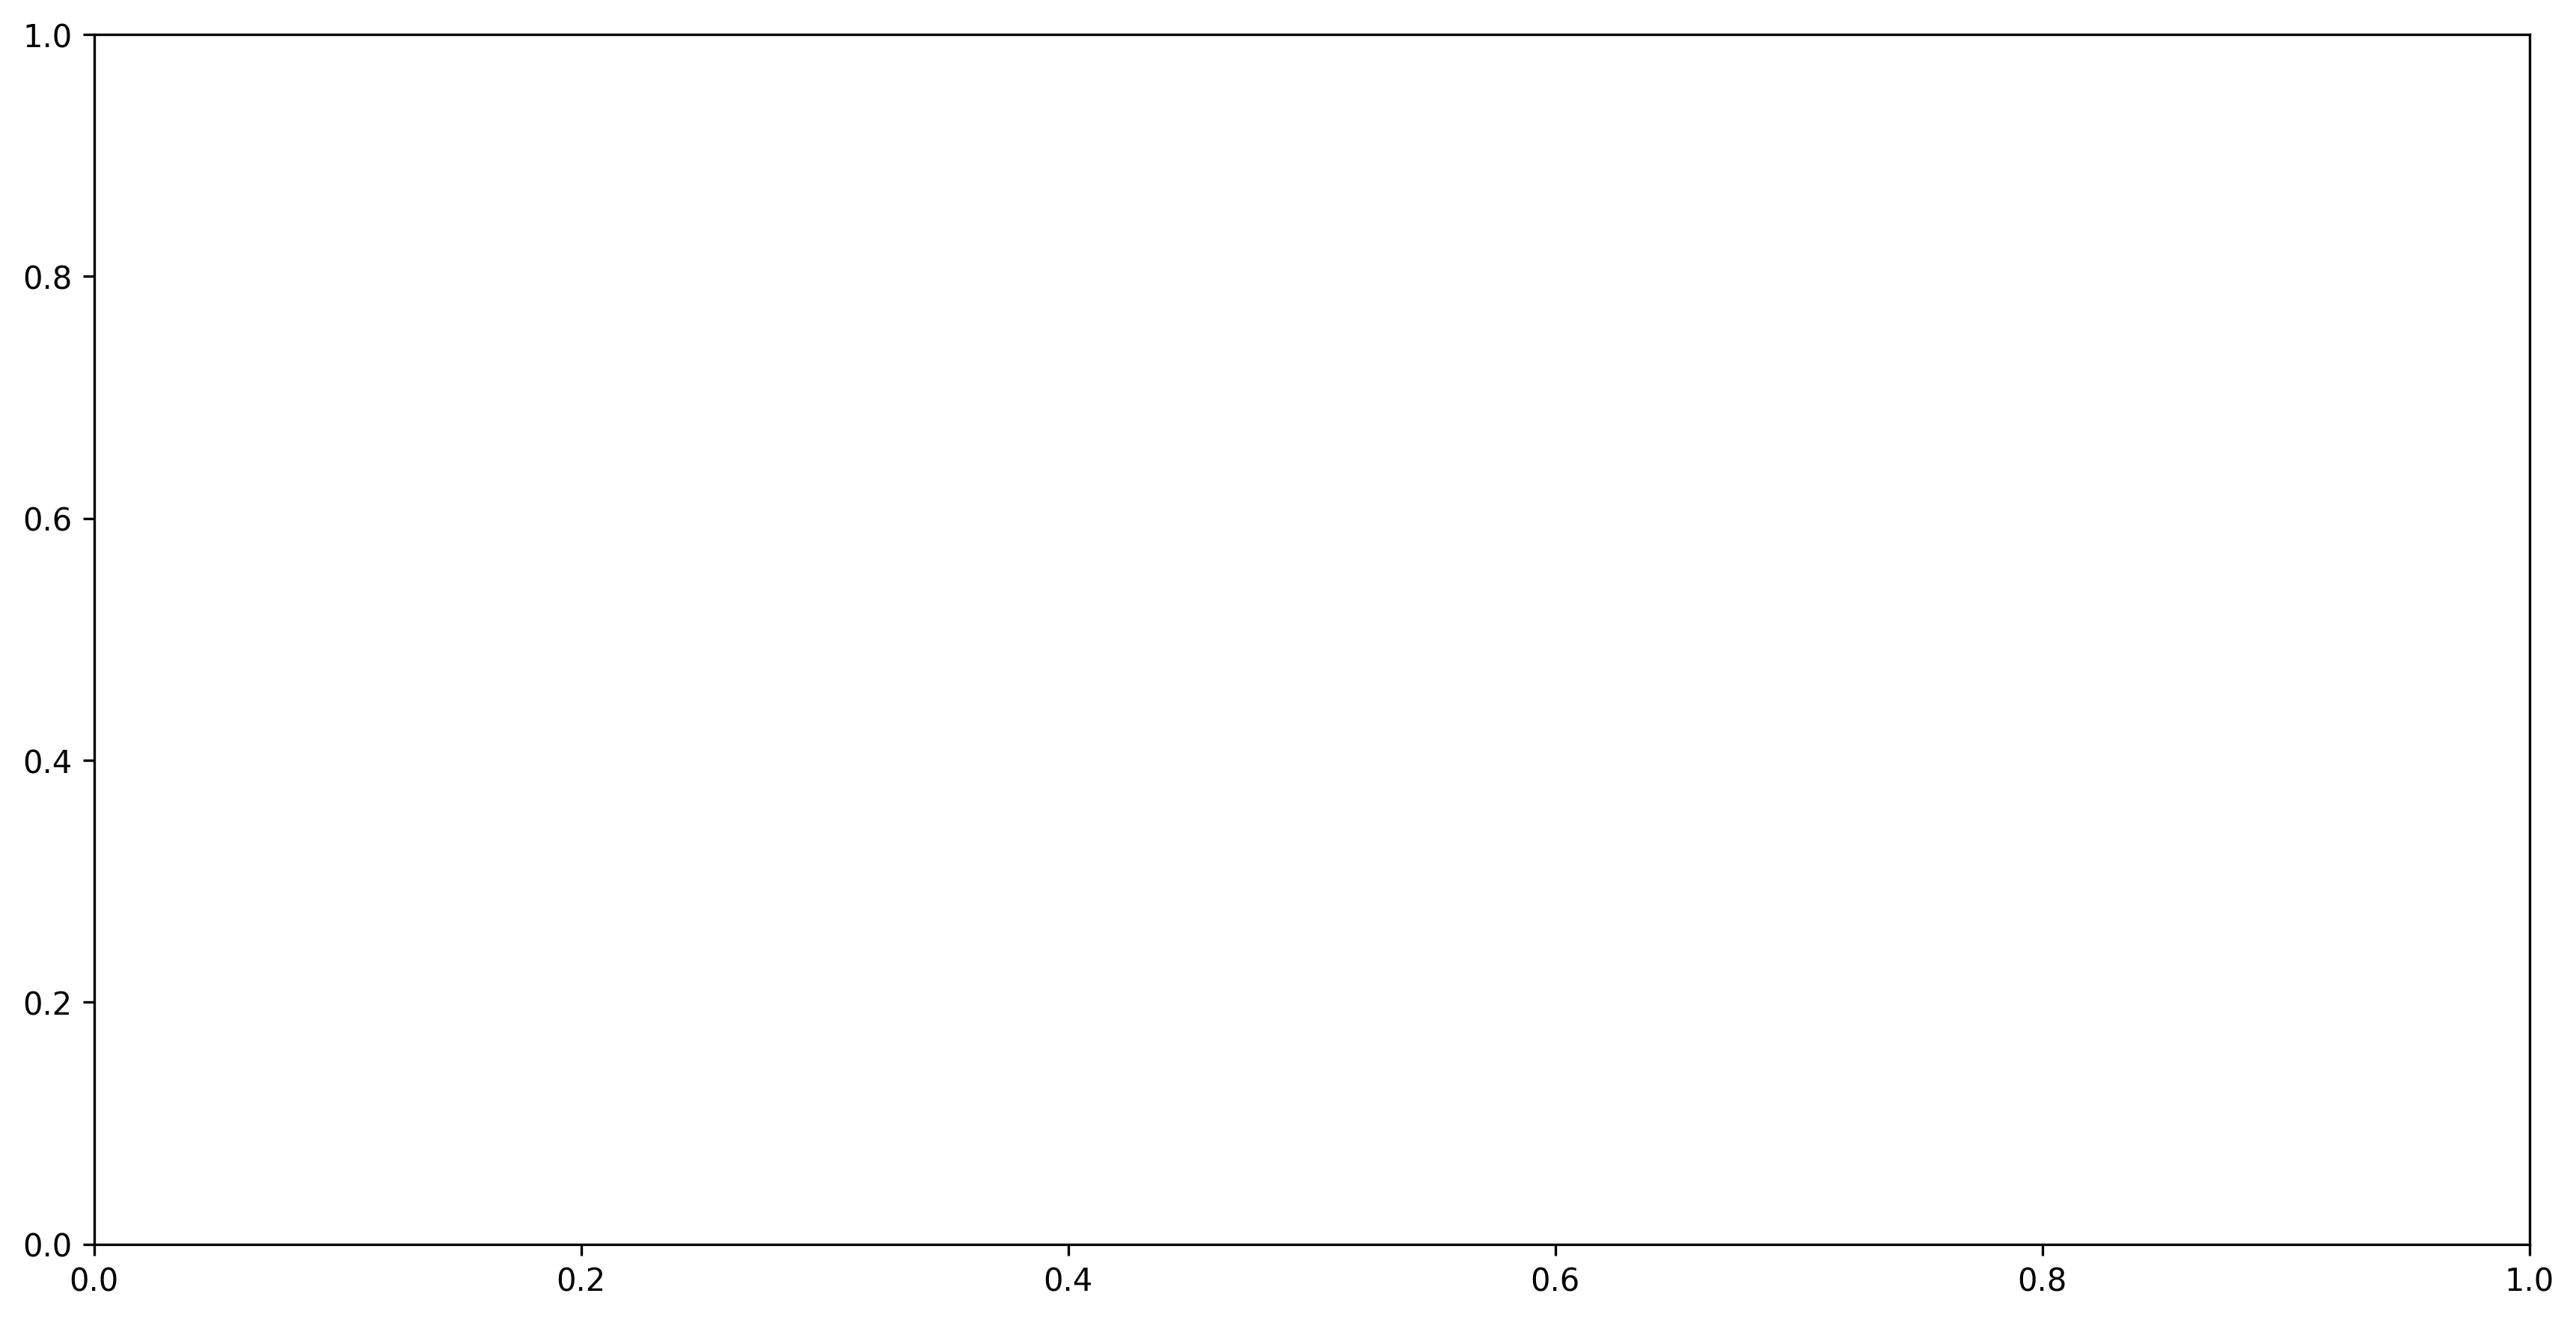

In [37]:
# Define the ticker symbol for Royal Caribbean Cruises Ltd.
ticker_symbol = 'RCL'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Define the start and end dates for the time period you're interested in.
start_date = '2018-08-01'
end_date = '2024-02-01'

# Get the historical prices for this ticker within the specified time frame
ticker_df = ticker_data.history(start=start_date, end=end_date)

# Reset the index to make 'Date' a column
ticker_df.reset_index(inplace=True)

# Convert 'Date' to just a date format without the time for ticker_df
ticker_df['Date'] = pd.to_datetime(ticker_df['Date']).dt.date

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=300)

# Plot sentiment scores on the primary y-axis
ax1.plot(combined_df['Date'], combined_df['CEO Sentiment Score'], label='CEO Sentiment', linestyle='-', marker='o')
ax1.plot(combined_df['Date'], combined_df['CFO Sentiment Score'], label='CFO Sentiment', linestyle='-', marker='x')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score')
ax1.legend(loc='upper left')

# Share Price on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(ticker_df['Date'], ticker_df['Close'], label='NCLH Share Price', linestyle='-', color='green')
ax2.set_ylabel('NCLH Share Price ($)')
ax2.legend(loc='upper right')

# Formatting dates on the x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set interval to 4 months

# Rotate the tick labels diagonally
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Title and grid
ax1.set_title('CEO and CFO Sentiment & RCL Share Price Over Time')
ax1.grid(True)

# Adding COVID background colors
colors = ['green', 'red', 'blue']  # Colors for Pre-COVID, COVID Lockdowns, and Post-COVID
for i, row in covid_periods_df.iterrows():
    ax1.axvspan(row['Start Date'], row['End Date'], color=colors[i], alpha=0.3, label=row['Period'])

# Show the plot
plt.tight_layout()

# Adding legend for COVID periods
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=labels, loc='upper left')
ax1.legend(title='COVID Periods')

plt.show()


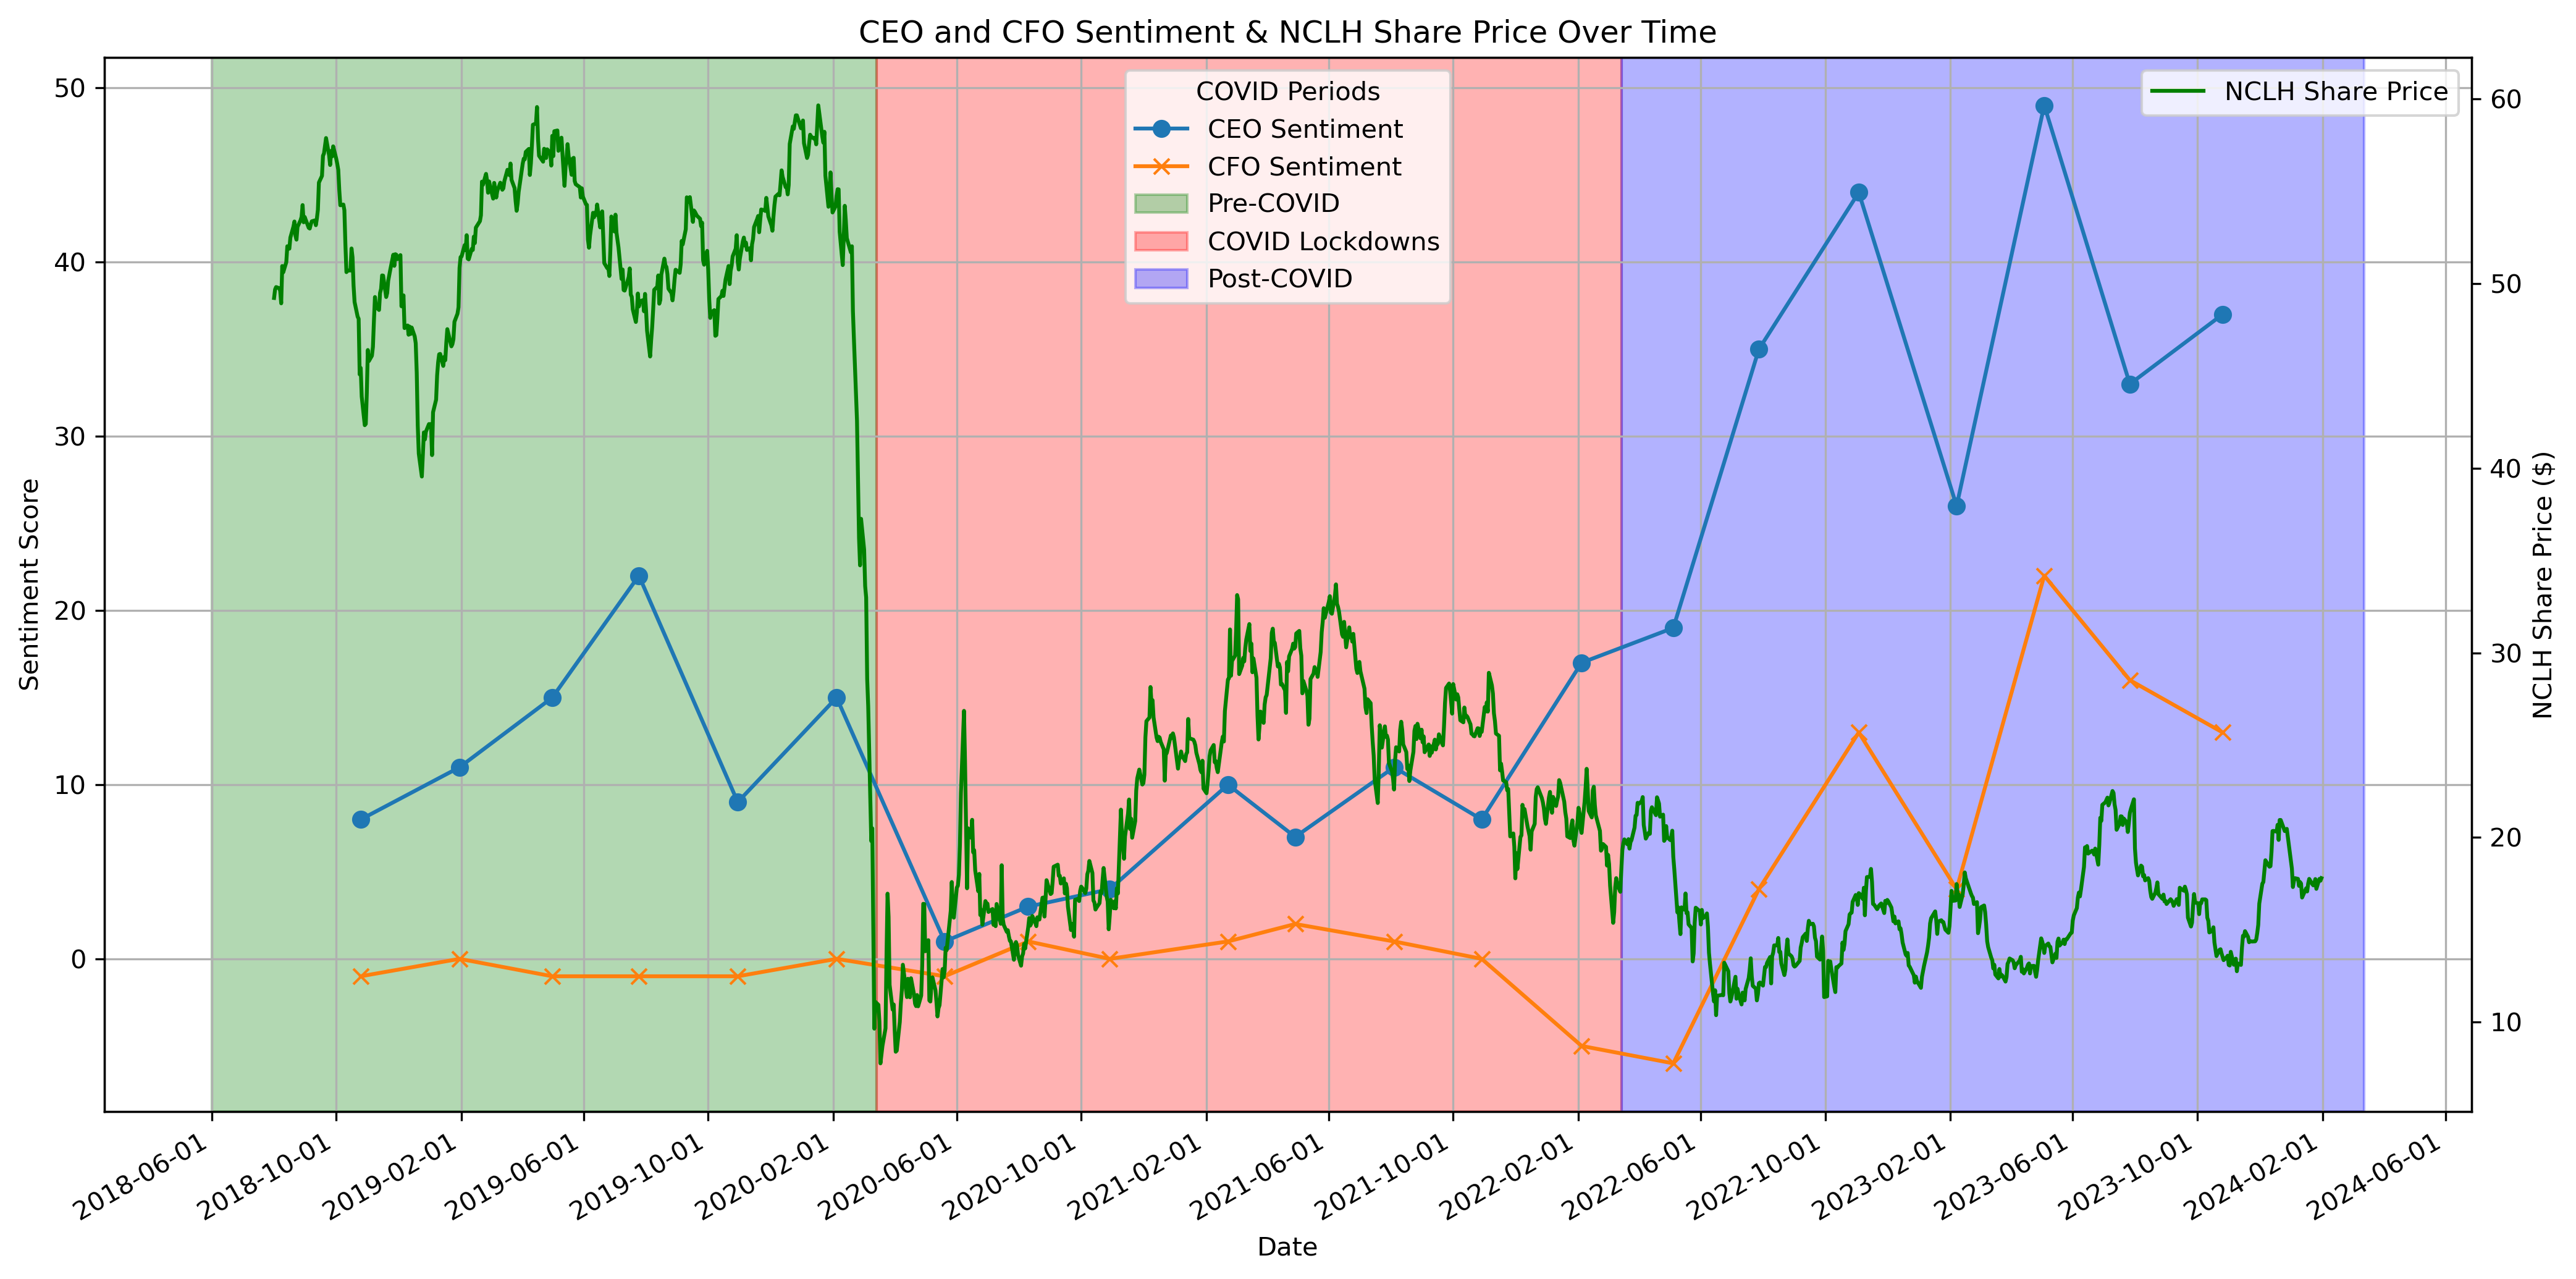

In [ ]:
ticker_symbol = 'NCLH'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Define the start and end dates for the time period you're interested in.
start_date = '2018-08-01'
end_date = '2024-02-01'

# Get the historical prices for this ticker within the specified time frame
ticker_df = ticker_data.history(start=start_date, end=end_date)

# Reset the index to make 'Date' a column
ticker_df.reset_index(inplace=True)

# Convert 'Date' to just a date format without the time for ticker_df
ticker_df['Date'] = pd.to_datetime(ticker_df['Date']).dt.date

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=300)

# Plot sentiment scores on the primary y-axis
ax1.plot(combined_df['Date'], combined_df['CEO Sentiment Score'], label='CEO Sentiment', linestyle='-', marker='o')
ax1.plot(combined_df['Date'], combined_df['CFO Sentiment Score'], label='CFO Sentiment', linestyle='-', marker='x')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score')
ax1.legend(loc='upper left')

# Share Price on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(ticker_df['Date'], ticker_df['Close'], label='NCLH Share Price', linestyle='-', color='green')
ax2.set_ylabel('NCLH Share Price ($)')
ax2.legend(loc='upper right')

# Formatting dates on the x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set interval to 4 months

# Rotate the tick labels diagonally
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Title and grid
ax1.set_title('CEO and CFO Sentiment & NCLH Share Price Over Time')
ax1.grid(True)

# Adding COVID background colors
colors = ['green', 'red', 'blue']  # Colors for Pre-COVID, COVID Lockdowns, and Post-COVID
for i, row in covid_periods_df.iterrows():
    ax1.axvspan(row['Start Date'], row['End Date'], color=colors[i], alpha=0.3, label=row['Period'])

# Show the plot
plt.tight_layout()

# Adding legend for COVID periods
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=labels, loc='upper left')
ax1.legend(title='COVID Periods')

plt.show()


In [ ]:
ticker_symbol = 'DAL'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Define the start and end dates for the time period you're interested in.
start_date = '2018-08-01'
end_date = '2024-02-01'

# Get the historical prices for this ticker within the specified time frame
ticker_df = ticker_data.history(start=start_date, end=end_date)

# Reset the index to make 'Date' a column
ticker_df.reset_index(inplace=True)

# Convert 'Date' to just a date format without the time for ticker_df
ticker_df['Date'] = pd.to_datetime(ticker_df['Date']).dt.date

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=300)

# Plot sentiment scores on the primary y-axis
ax1.plot(combined_df['Date'], combined_df['CEO Sentiment Score'], label='CEO Sentiment', linestyle='-', marker='o')
ax1.plot(combined_df['Date'], combined_df['CFO Sentiment Score'], label='CFO Sentiment', linestyle='-', marker='x')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score')
ax1.legend(loc='upper left')

# Share Price on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(ticker_df['Date'], ticker_df['Close'], label='DAL Share Price', linestyle='-', color='green')
ax2.set_ylabel('DAL Share Price ($)')
ax2.legend(loc='upper right')

# Formatting dates on the x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set interval to 4 months

# Rotate the tick labels diagonally
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Title and grid
ax1.set_title('CEO and CFO Sentiment & DAL Share Price Over Time')
ax1.grid(True)

# Adding COVID background colors
colors = ['green', 'red', 'blue']  # Colors for Pre-COVID, COVID Lockdowns, and Post-COVID
for i, row in covid_periods_df.iterrows():
    ax1.axvspan(row['Start Date'], row['End Date'], color=colors[i], alpha=0.3, label=row['Period'])

# Show the plot
plt.tight_layout()

# Adding legend for COVID periods
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=labels, loc='upper left')
ax1.legend(title='COVID Periods')

plt.show()


## Final Vizualisations with Volume Traded

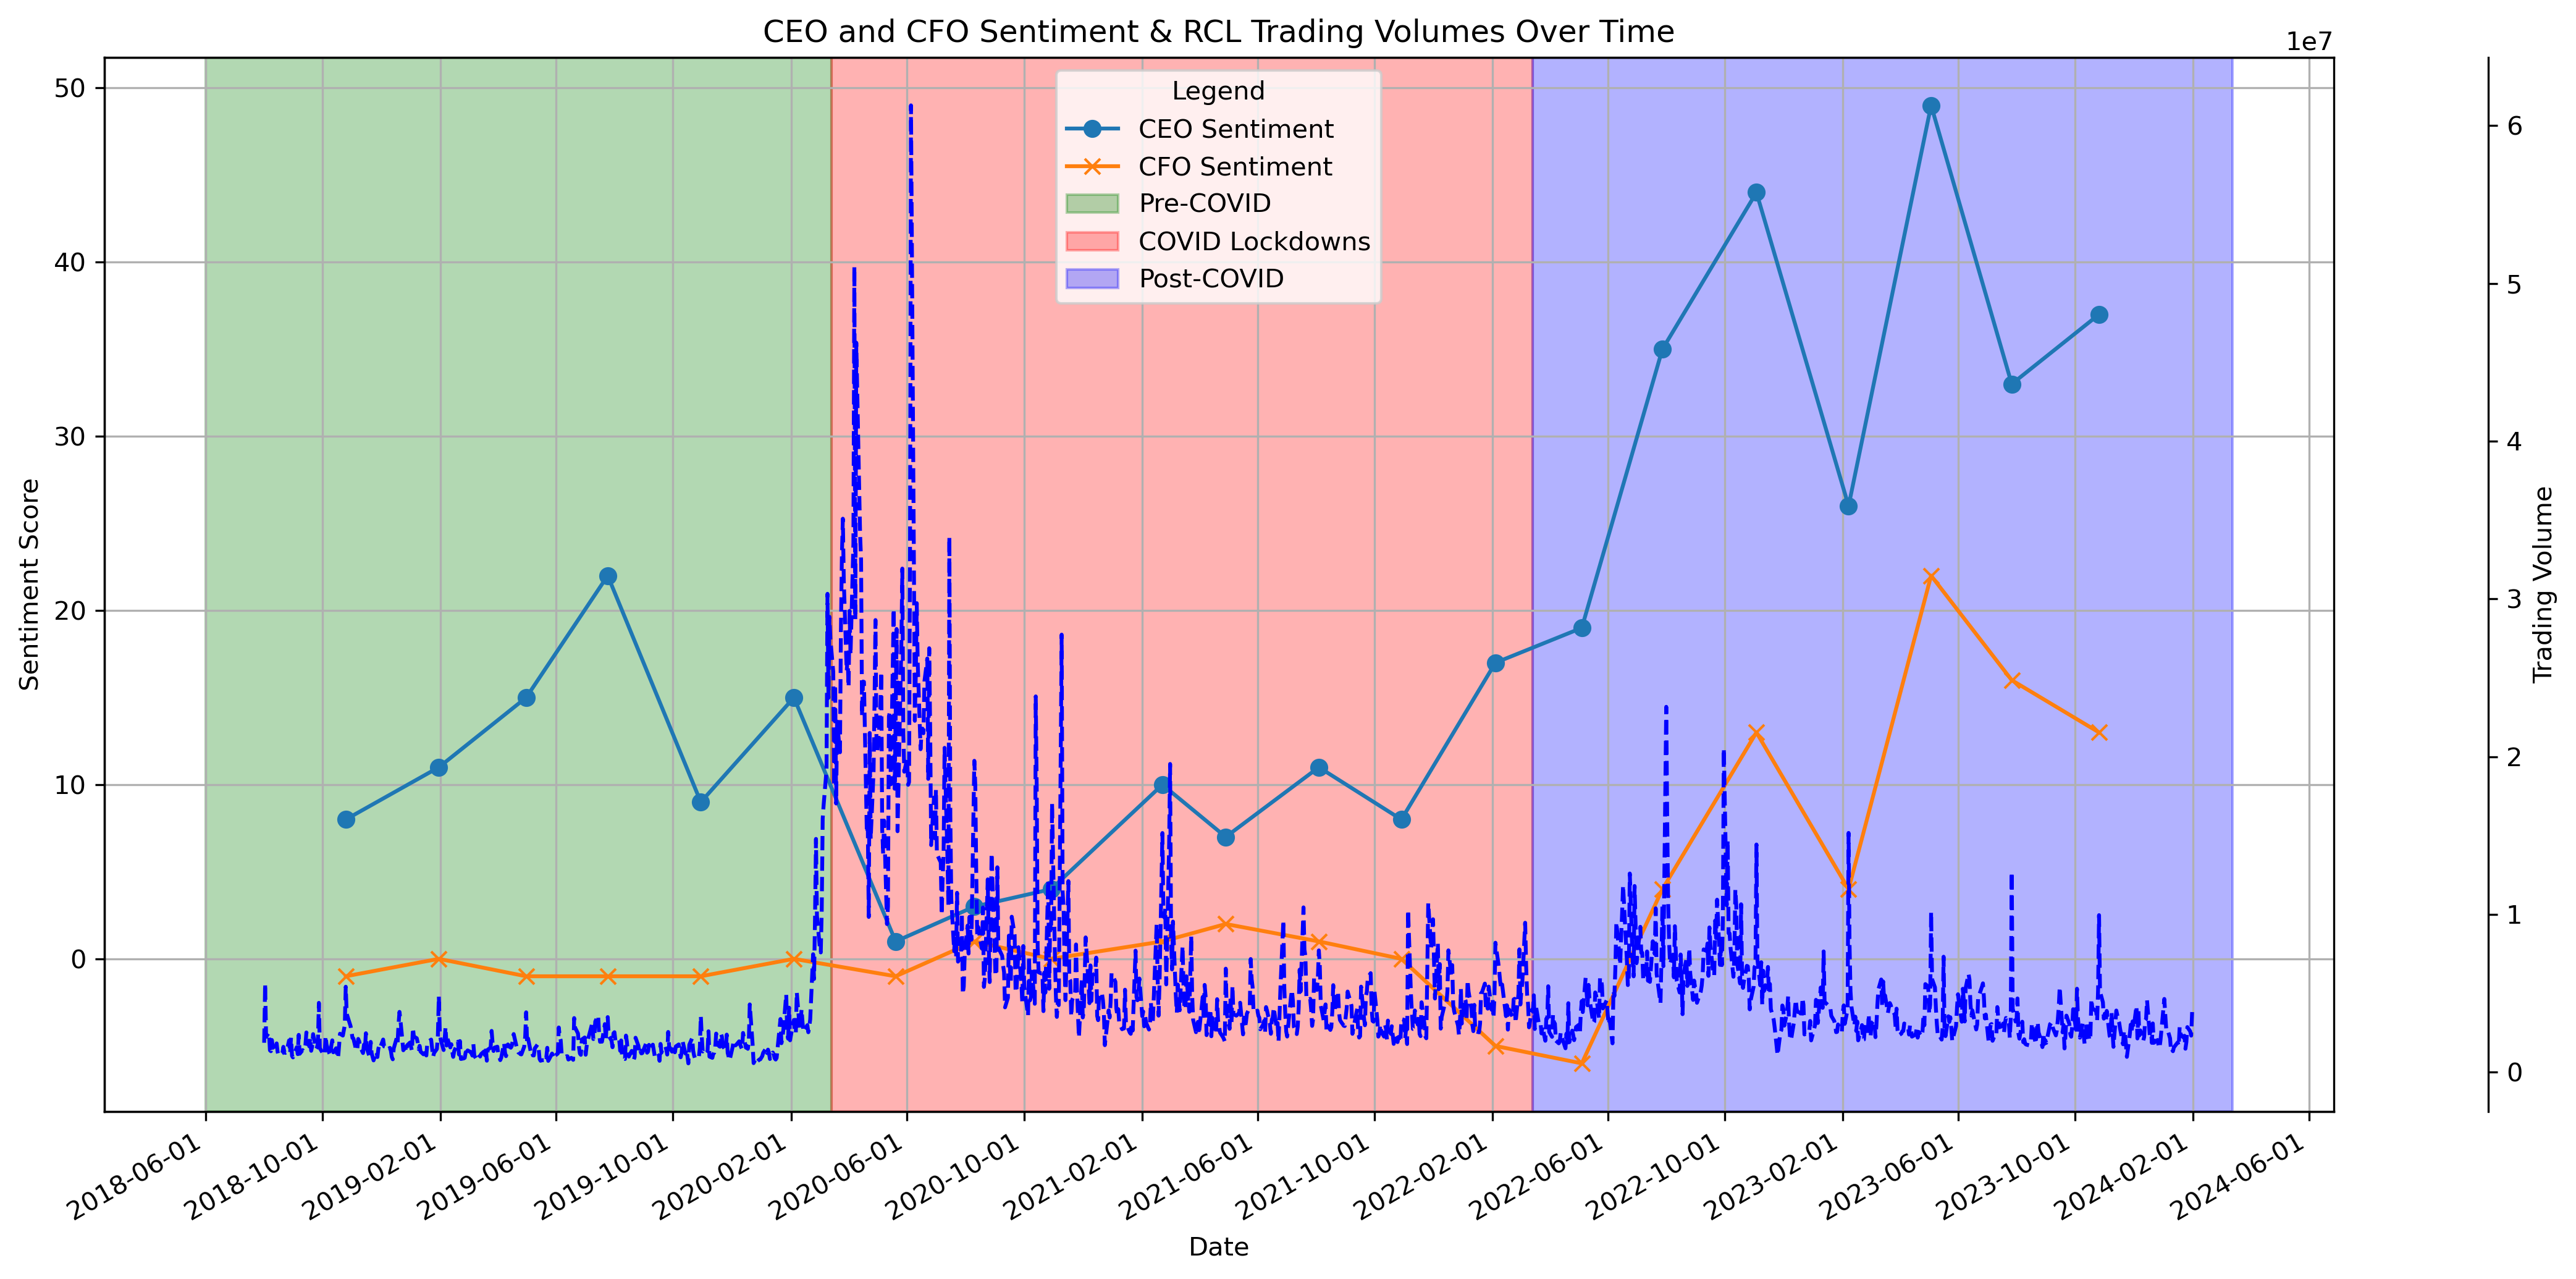

In [ ]:
# Define the ticker symbol for Royal Caribbean Cruises Ltd.
ticker_symbol = 'RCL'
#ticker_symbol = 'NCLH'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Define the start and end dates for the time period you're interested in.
start_date = '2018-08-01'
end_date = '2024-02-01'

# Get the historical prices for this ticker within the specified time frame
ticker_df = ticker_data.history(start=start_date, end=end_date)

# Reset the index to make 'Date' a column
ticker_df.reset_index(inplace=True)

# Convert 'Date' to just a date format without the time for ticker_df
ticker_df['Date'] = pd.to_datetime(ticker_df['Date']).dt.date

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=300)

# Plot sentiment scores on the primary y-axis
ax1.plot(combined_df['Date'], combined_df['CEO Sentiment Score'], label='CEO Sentiment', linestyle='-', marker='o')
ax1.plot(combined_df['Date'], combined_df['CFO Sentiment Score'], label='CFO Sentiment', linestyle='-', marker='x')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score')
ax1.legend(loc='upper left')

# Trading volumes on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(ticker_df['Date'], ticker_df['Volume'], label='RCL Trading Volume', linestyle='--', color='blue')
ax2.set_ylabel('Trading Volume')
ax2.spines['right'].set_position(('outward', 60))  # Adjust position of this axis

# Formatting dates on the x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set interval to 4 months

# Rotate the tick labels diagonally
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Title and grid
ax1.set_title('CEO and CFO Sentiment & RCL Trading Volumes Over Time')
ax1.grid(True)

# Adding COVID background colors
colors = ['green', 'red', 'blue']  # Colors for Pre-COVID, COVID Lockdowns, and Post-COVID
for i, row in covid_periods_df.iterrows():
    ax1.axvspan(row['Start Date'], row['End Date'], color=colors[i], alpha=0.3, label=row['Period'])

# Show the plot
plt.tight_layout()

# Adding legend for COVID periods
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper left')
ax1.legend(title='Legend')

plt.show()


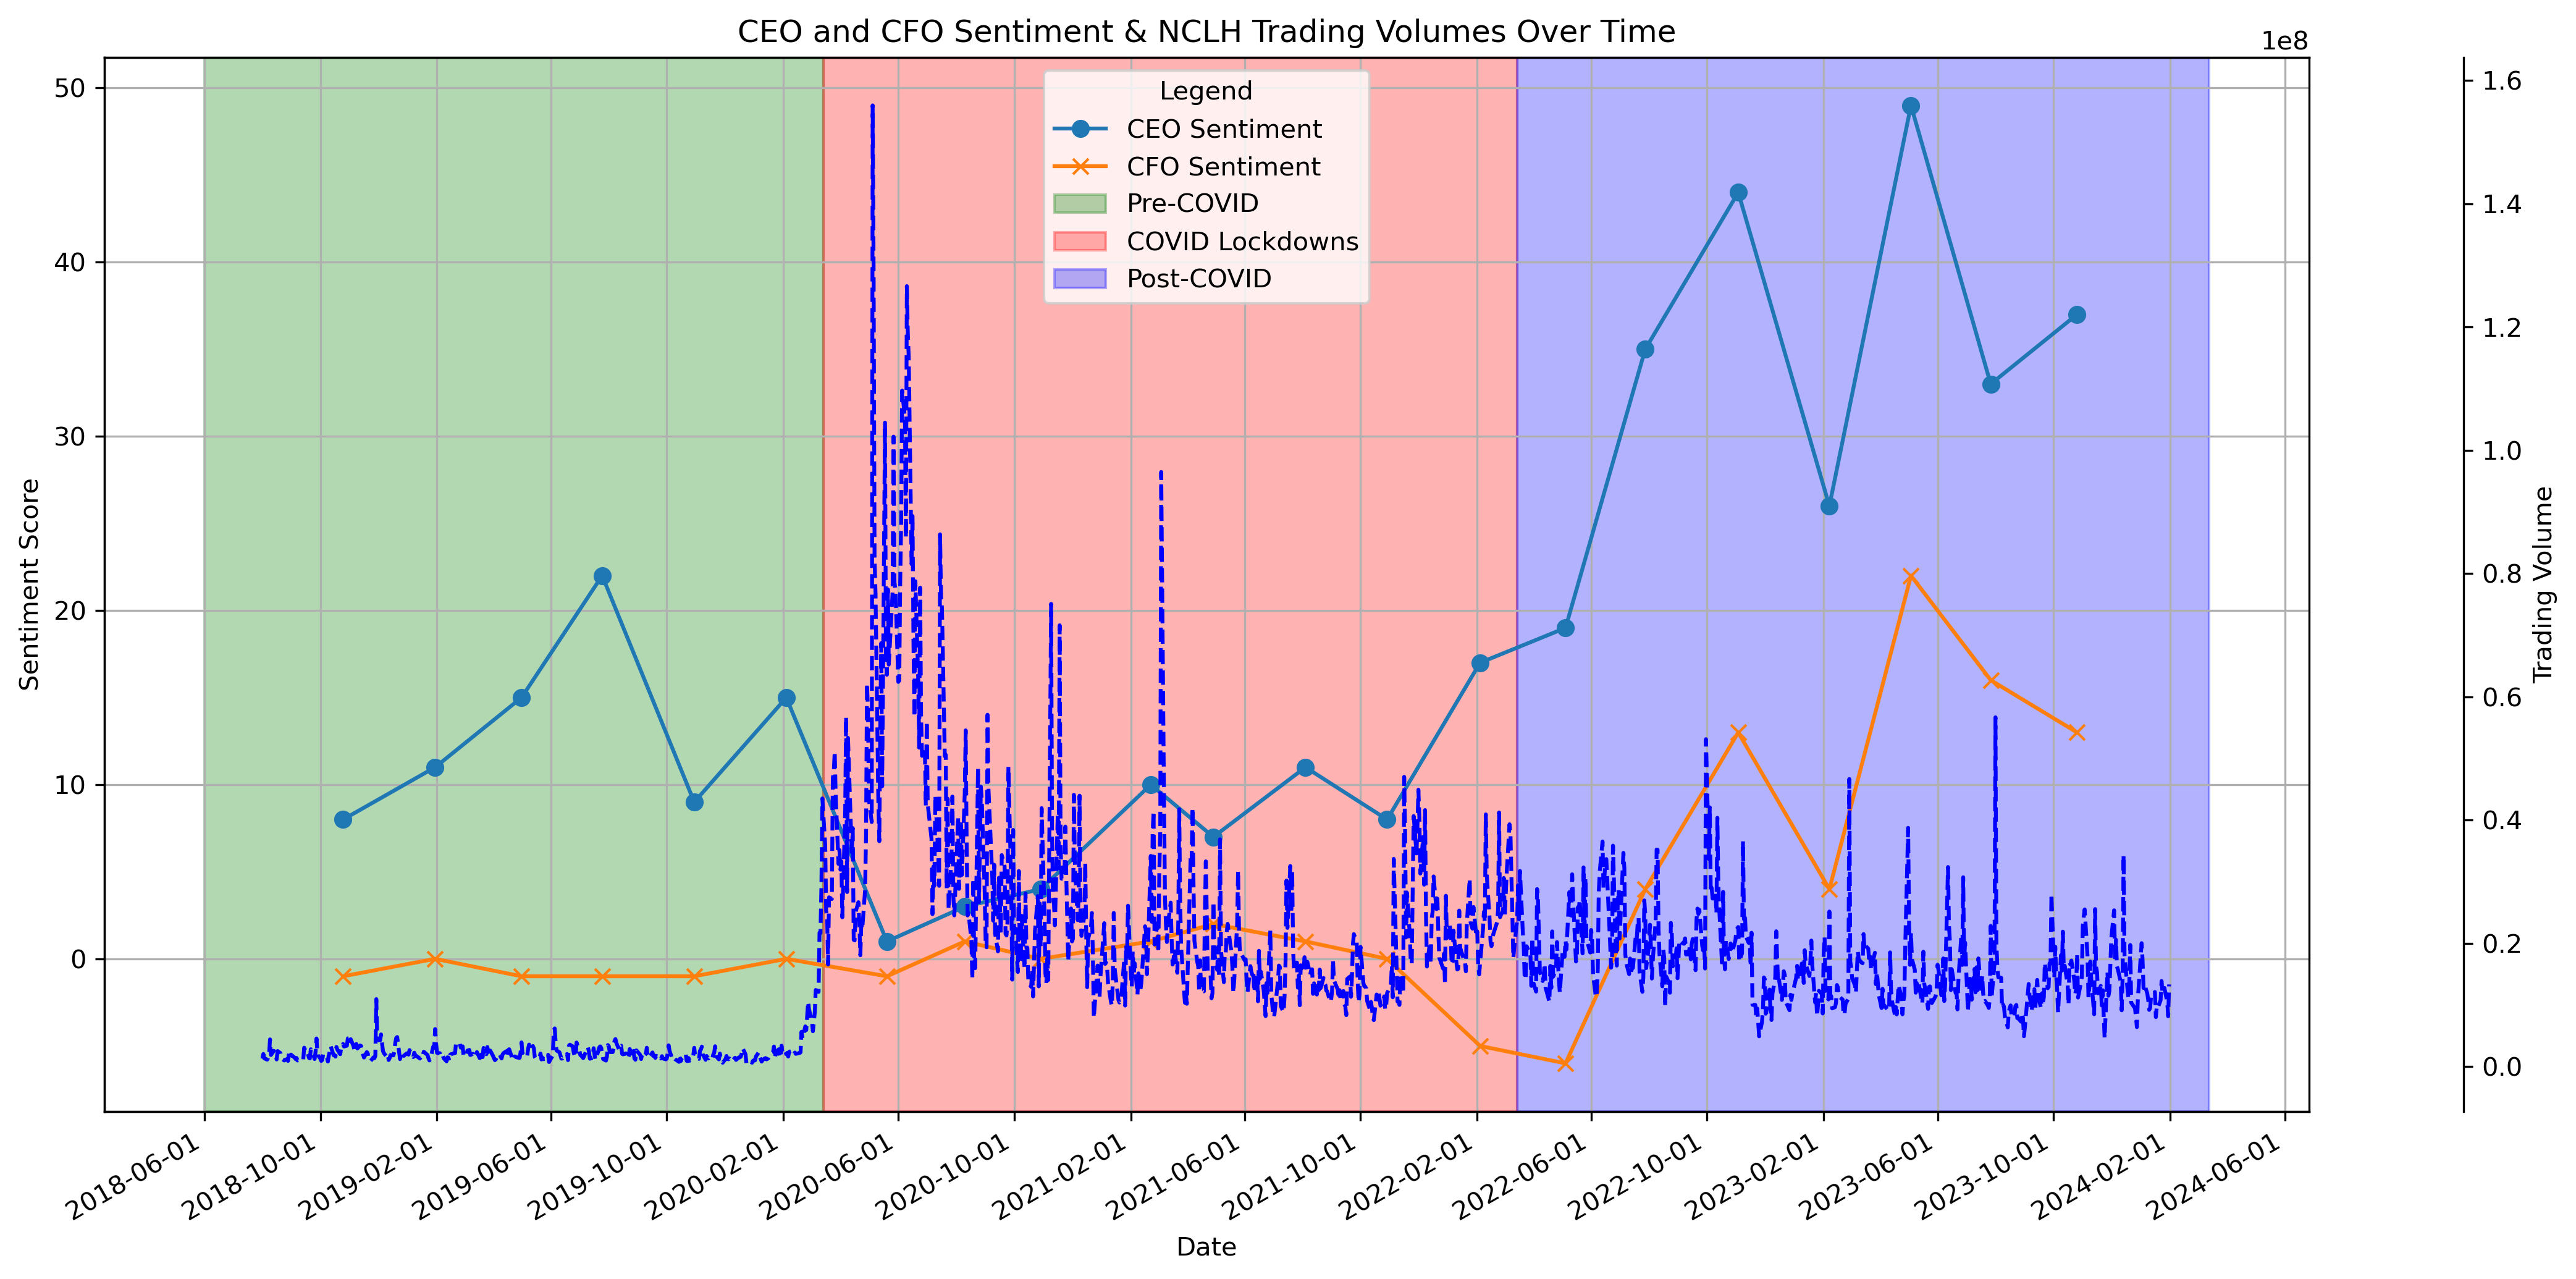

In [ ]:
ticker_symbol = 'NCLH'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Define the start and end dates for the time period you're interested in.
start_date = '2018-08-01'
end_date = '2024-02-01'

# Get the historical prices for this ticker within the specified time frame
ticker_df = ticker_data.history(start=start_date, end=end_date)

# Reset the index to make 'Date' a column
ticker_df.reset_index(inplace=True)

# Convert 'Date' to just a date format without the time for ticker_df
ticker_df['Date'] = pd.to_datetime(ticker_df['Date']).dt.date

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=300)

# Plot sentiment scores on the primary y-axis
ax1.plot(combined_df['Date'], combined_df['CEO Sentiment Score'], label='CEO Sentiment', linestyle='-', marker='o')
ax1.plot(combined_df['Date'], combined_df['CFO Sentiment Score'], label='CFO Sentiment', linestyle='-', marker='x')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score')
ax1.legend(loc='upper left')

# Trading volumes on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(ticker_df['Date'], ticker_df['Volume'], label='RCL Trading Volume', linestyle='--', color='blue')
ax2.set_ylabel('Trading Volume')
ax2.spines['right'].set_position(('outward', 60))  # Adjust position of this axis

# Formatting dates on the x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set interval to 4 months

# Rotate the tick labels diagonally
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Title and grid
ax1.set_title('CEO and CFO Sentiment & NCLH Trading Volumes Over Time')
ax1.grid(True)

# Adding COVID background colors
colors = ['green', 'red', 'blue']  # Colors for Pre-COVID, COVID Lockdowns, and Post-COVID
for i, row in covid_periods_df.iterrows():
    ax1.axvspan(row['Start Date'], row['End Date'], color=colors[i], alpha=0.3, label=row['Period'])

# Show the plot
plt.tight_layout()

# Adding legend for COVID periods
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper left')
ax1.legend(title='Legend')

plt.show()


In [ ]:
ticker_symbol = 'DAL'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Define the start and end dates for the time period you're interested in.
start_date = '2018-08-01'
end_date = '2024-02-01'

# Get the historical prices for this ticker within the specified time frame
ticker_df = ticker_data.history(start=start_date, end=end_date)

# Reset the index to make 'Date' a column
ticker_df.reset_index(inplace=True)

# Convert 'Date' to just a date format without the time for ticker_df
ticker_df['Date'] = pd.to_datetime(ticker_df['Date']).dt.date

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=300)

# Plot sentiment scores on the primary y-axis
ax1.plot(combined_df['Date'], combined_df['CEO Sentiment Score'], label='CEO Sentiment', linestyle='-', marker='o')
ax1.plot(combined_df['Date'], combined_df['CFO Sentiment Score'], label='CFO Sentiment', linestyle='-', marker='x')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score')
ax1.legend(loc='upper left')

# Trading volumes on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(ticker_df['Date'], ticker_df['Volume'], label='DAL Trading Volume', linestyle='--', color='blue')
ax2.set_ylabel('Trading Volume')
ax2.spines['right'].set_position(('outward', 60))  # Adjust position of this axis

# Formatting dates on the x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set interval to 4 months

# Rotate the tick labels diagonally
plt.gcf().autofmt_xdate()  # Auto-rotates the dates to show them more clearly

# Title and grid
ax1.set_title('CEO and CFO Sentiment & DAL Trading Volumes Over Time')
ax1.grid(True)

# Adding COVID background colors
colors = ['green', 'red', 'blue']  # Colors for Pre-COVID, COVID Lockdowns, and Post-COVID
for i, row in covid_periods_df.iterrows():
    ax1.axvspan(row['Start Date'], row['End Date'], color=colors[i], alpha=0.3, label=row['Period'])

# Show the plot
plt.tight_layout()

# Adding legend for COVID periods
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper left')
ax1.legend(title='Legend')

plt.show()


# Bag of Words

In [ ]:
"""
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming df_preprocessed is your DataFrame

# Combine CEO and CFO text into a single column
df_preprocessed['Combined Text'] = df_preprocessed['CEO Text Cleaned'] + ' ' + df_preprocessed['CFO Text Cleaned']

# Tokenize the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_preprocessed['Combined Text'])

# Convert the result to DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Add Title and Date columns to the bow_df
bow_df[['Title', 'Date']] = df_preprocessed[['Title', 'Date']]

# Display the resulting DataFrame
bow_df.head(20)
"""

"\nfrom sklearn.feature_extraction.text import CountVectorizer\nimport pandas as pd\n\n# Assuming df_preprocessed is your DataFrame\n\n# Combine CEO and CFO text into a single column\ndf_preprocessed['Combined Text'] = df_preprocessed['CEO Text Cleaned'] + ' ' + df_preprocessed['CFO Text Cleaned']\n\n# Tokenize the text\nvectorizer = CountVectorizer()\nX = vectorizer.fit_transform(df_preprocessed['Combined Text'])\n\n# Convert the result to DataFrame\nbow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())\n\n# Add Title and Date columns to the bow_df\nbow_df[['Title', 'Date']] = df_preprocessed[['Title', 'Date']]\n\n# Display the resulting DataFrame\nbow_df.head(20)\n"

In [ ]:
"""
from sklearn.decomposition import LatentDirichletAllocation
# Step 5: Perform Topic Modeling (Latent Dirichlet Allocation)
num_topics = 5  # Number of topics to identify
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the top words for each topic
print("Top words for each topic:")
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(top_words)
"""

'\nfrom sklearn.decomposition import LatentDirichletAllocation\n# Step 5: Perform Topic Modeling (Latent Dirichlet Allocation)\nnum_topics = 5  # Number of topics to identify\nlda = LatentDirichletAllocation(n_components=num_topics, random_state=42)\nlda.fit(X)\n\n# Display the top words for each topic\nprint("Top words for each topic:")\nfor topic_idx, topic in enumerate(lda.components_):\n    print(f"Topic {topic_idx}:")\n    top_words_idx = topic.argsort()[:-10 - 1:-1]\n    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]\n    print(top_words)\n'

In [ ]:
"""
# Step 6: Generate Word Clouds for each topic
for topic_idx, topic in enumerate(lda.components_):
    word_freq = {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-30 - 1:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx} Word Cloud')
    plt.axis('off')
    plt.show()
"""

"\n# Step 6: Generate Word Clouds for each topic\nfor topic_idx, topic in enumerate(lda.components_):\n    word_freq = {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-30 - 1:-1]}\n    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)\n    plt.figure(figsize=(10, 5))\n    plt.imshow(wordcloud, interpolation='bilinear')\n    plt.title(f'Topic {topic_idx} Word Cloud')\n    plt.axis('off')\n    plt.show()\n"

In [ ]:
"""
# Step 7: Assign Topic Probabilities to Documents

# Get the document-topic probabilities
doc_topic_probs = lda.transform(X)

# Create a DataFrame to store document-topic probabilities
doc_topic_df = pd.DataFrame(doc_topic_probs, columns=[f"Topic {i}" for i in range(num_topics)])

# Add Title and Date columns to the DataFrame
doc_topic_df[['Title', 'Date']] = df_preprocessed[['Title', 'Date']]

# Display the resulting DataFrame
print("Document-Topic Probabilities:")
doc_topic_df.head(20)
"""


'\n# Step 7: Assign Topic Probabilities to Documents\n\n# Get the document-topic probabilities\ndoc_topic_probs = lda.transform(X)\n\n# Create a DataFrame to store document-topic probabilities\ndoc_topic_df = pd.DataFrame(doc_topic_probs, columns=[f"Topic {i}" for i in range(num_topics)])\n\n# Add Title and Date columns to the DataFrame\ndoc_topic_df[[\'Title\', \'Date\']] = df_preprocessed[[\'Title\', \'Date\']]\n\n# Display the resulting DataFrame\nprint("Document-Topic Probabilities:")\ndoc_topic_df.head(20)\n'

In [ ]:
"""
# Analyze Topic Distribution
topic_distribution = doc_topic_df.iloc[:, :-2].mean(axis=0)  # Calculate mean topic probability across all documents
topic_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Topics Across Documents')
plt.xlabel('Topic')
plt.ylabel('Mean Probability')
plt.xticks(rotation=0)
plt.show()
"""


"\n# Analyze Topic Distribution\ntopic_distribution = doc_topic_df.iloc[:, :-2].mean(axis=0)  # Calculate mean topic probability across all documents\ntopic_distribution.plot(kind='bar', figsize=(10, 6))\nplt.title('Distribution of Topics Across Documents')\nplt.xlabel('Topic')\nplt.ylabel('Mean Probability')\nplt.xticks(rotation=0)\nplt.show()\n"

# Regression using RCL
----------

In [ ]:
df_regression_rcl= df_lm_rcl.copy()

In [ ]:
# Define the ticker symbol for your company, e.g., NCLH for Norwegian Cruise Line Holdings Ltd.
ticker_symbol = 'RCL'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker_data.history(period="max")  # Adjust the period as necessary

# Reset the index to make 'Date' a column in the DataFrame
historical_data.reset_index(inplace=True)

# Focus on the 'Date' and 'Close' columns for simplicity
share_prices = historical_data[['Date', 'Close']]
share_prices
# First, ensure 'Date' is in datetime format
share_prices['Date'] = pd.to_datetime(share_prices['Date'])

# Convert datetime to date (removing time and timezone)
share_prices['Date'] = share_prices['Date'].dt.date
share_prices

Date       Close
0     1993-04-28    5.865184
1     1993-04-29    5.985700
2     1993-04-30    5.905354
3     1993-05-03    5.905354
4     1993-05-04    5.825009
...          ...         ...
7770  2024-03-07  124.349998
7771  2024-03-08  127.470001
7772  2024-03-11  127.800003
7773  2024-03-12  129.740005
7774  2024-03-13  132.492493

[7775 rows x 2 columns]

In [ ]:
df_regression_rcl = df_regression_rcl[['Date', 'Title', 'CEO Sentiment Score', 'CFO Sentiment Score']]
df_regression_rcl.head(25)

Date                                              Title  \
21 2018-10-25  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...   
20 2019-01-30  Royal Caribbean Cruises Ltd (RCL) Q4 2018 Earn...   
19 2019-05-01  Royal Caribbean Cruises Ltd (RCL) Q1 2019 Earn...   
18 2019-07-25  Royal Caribbean Cruises Ltd (RCL) Q2 2019 Earn...   
17 2019-10-30  Royal Caribbean Cruises Ltd (RCL) Q3 2019 Earn...   
16 2020-02-04  Royal Caribbean Cruises Ltd (RCL) Q4 2019 Earn...   
15 2020-05-20  Royal Caribbean Cruises Ltd (RCL) Q1 2020 Earn...   
14 2020-08-10  Royal Caribbean (RCL) Q2 2020 Earnings Call Tr...   
13 2020-10-29  Royal Caribbean (RCL) Q3 2020 Earnings Call Tr...   
12 2021-02-22  Royal Caribbean (RCL) Q4 2020 Earnings Call Tr...   
11 2021-04-29  Royal Caribbean (RCL) Q1 2021 Earnings Call Tr...   
10 2021-08-04  Royal Caribbean (RCL) Q2 2021 Earnings Call Tr...   
9  2021-10-29  Royal Caribbean (RCL) Q3 2021 Earnings Call Tr...   
8  2022-02-04  Royal Caribbean (RCL) Q4 2021 Earnings Call Tr...   
7  2022-05-05  Royal Caribbean (RCL) Q1 2022 Earnings Call Tr...   
6  2022-07-28  Royal Caribbean (RCL) Q2 2022 Earnings Call Tr...   
5  2022-11-03  Royal Caribbean (RCL) Q3 2022 Earnings Call Tr...   
4  2023-02-07  Royal Caribbean Cruises (RCL) Q4 2022 Earnings...   
3  2023-05-04  Royal Caribbean Cruises (RCL) Q1 2023 Earnings...   
2  2023-07-27  Royal Caribbean Cruises (RCL) Q2 2023 Earnings...   
1  2023-10-26  Royal Caribbean Cruises (RCL) Q3 2023 Earnings...   
0  2024-02-01  Royal Caribbean Cruises (RCL) Q4 2023 Earnings...   

    CEO Sentiment Score  CFO Sentiment Score  
21                    8                   -1  
20                   11                    0  
19                   15                   -1  
18                   22                   -1  
17                    9                   -1  
16                   15                    0  
15                    1                   -1  
14                    3                    1  
13                    4                    0  
12                   10                    1  
11                    7                    2  
10                   11                    1  
9                     8                    0  
8                    17                   -5  
7                    19                   -6  
6                    35                    4  
5                    44                   13  
4                    26                    4  
3                    49                   22  
2                    33                   16  
1                    37                   13  
0                    34                   11

In [ ]:
# Convert 'Date' columns in both DataFrames to datetime objects and ensure they're timezone-naive
df_regression_rcl['Date'] = pd.to_datetime(df_regression_rcl['Date']).dt.tz_localize(None)
share_prices['Date'] = pd.to_datetime(share_prices['Date']).dt.tz_localize(None)

# Ensure both DataFrames are sorted by 'Date'
df_regression_rcl = df_regression_rcl.sort_values(by='Date')
share_prices = share_prices.sort_values(by='Date')

# Perform the asof merge to match each share price with the nearest preceding earnings call
merged_df_regression_rcl = pd.merge_asof(share_prices, df_regression_rcl, on='Date', direction='backward')

# Filter the DataFrame to keep only rows on or after September 1, 2018
filtered_df_regression_rcl = merged_df_regression_rcl[merged_df_regression_rcl['Date'] >= pd.Timestamp('2018-10-25')]

# Display the fi
filtered_df_regression_rcl.head(15)

Date       Close  \
6422 2018-10-25  103.579086   
6423 2018-10-26   98.905838   
6424 2018-10-29   95.499268   
6425 2018-10-30   97.696747   
6426 2018-10-31  100.498787   
6427 2018-11-01  104.068481   
6428 2018-11-02  101.525558   
6429 2018-11-05  101.544746   
6430 2018-11-06  101.832626   
6431 2018-11-07  104.625046   
6432 2018-11-08  103.339188   
6433 2018-11-09  102.840195   
6434 2018-11-12  100.441200   
6435 2018-11-13  101.947769   
6436 2018-11-14  102.206871   

                                                  Title  CEO Sentiment Score  \
6422  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6423  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6424  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6425  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6426  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6427  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6428  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6429  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6430  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6431  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6432  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6433  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6434  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6435  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   
6436  Royal Caribbean Cruises Ltd (RCL) Q3 2018 Earn...                  8.0   

      CFO Sentiment Score  
6422                 -1.0  
6423                 -1.0  
6424                 -1.0  
6425                 -1.0  
6426                 -1.0  
6427                 -1.0  
6428                 -1.0  
6429                 -1.0  
6430                 -1.0  
6431                 -1.0  
6432                 -1.0  
6433                 -1.0  
6434                 -1.0  
6435                 -1.0  
6436                 -1.0

In [ ]:

# regression function of CEO sentiment score and CFO sentiment score on the share price
import statsmodels.api as sm

# Define the independent variables (CEO and CFO sentiment scores)
X = filtered_df_regression_rcl[['CEO Sentiment Score', 'CFO Sentiment Score']]
# Define the dependent variable (share price)
y = filtered_df_regression_rcl['Close']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
linear_model = sm.OLS(y, X).fit()
# Print the model summary
print(linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     36.14
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           5.12e-16
Time:                        18:38:08   Log-Likelihood:                -6294.2
No. Observations:                1353   AIC:                         1.259e+04
Df Residuals:                    1350   BIC:                         1.261e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  89.7830    

# Regression using NCHL 
# "Robustness Check"
----------

In [ ]:
df_regression_nchl= df_lm_nclh.copy()

In [ ]:
# Define the ticker symbol for your company, e.g., NCLH for Norwegian Cruise Line Holdings Ltd.
ticker_symbol = 'NCLH'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker_data.history(period="max")  # Adjust the period as necessary

# Reset the index to make 'Date' a column in the DataFrame
historical_data.reset_index(inplace=True)

# Focus on the 'Date' and 'Close' columns for simplicity
share_prices = historical_data[['Date', 'Close']]

share_prices
# First, ensure 'Date' is in datetime format
share_prices['Date'] = pd.to_datetime(share_prices['Date'])

# Convert datetime to date (removing time and timezone)
share_prices['Date'] = share_prices['Date'].dt.date
share_prices

Date      Close
0     2013-01-18  24.790001
1     2013-01-22  26.950001
2     2013-01-23  27.490000
3     2013-01-24  27.350000
4     2013-01-25  27.350000
...          ...        ...
2801  2024-03-07  19.629999
2802  2024-03-08  19.990000
2803  2024-03-11  19.799999
2804  2024-03-12  19.559999
2805  2024-03-13  19.885000

[2806 rows x 2 columns]

In [ ]:
df_regression_nchl = df_regression_nchl[['Date', 'Title', 'CEO Sentiment Score', 'CFO Sentiment Score']]
df_regression_nchl.head(25)

Date                                              Title  \
18 2018-11-08  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
17 2019-02-21  Norwegian Cruise Line Holdings Ltd (NCLH) Q4 2...   
16 2019-05-09  Norwegian Cruise Line Holdings (NCLH) Q1 2019 ...   
15 2019-08-08  Norwegian Cruise Line Holdings (NCLH) Q2 2019 ...   
14 2019-11-07  Norwegian Cruise Line Holdings (NCLH) Q3 2019 ...   
13 2020-02-20  Norwegian Cruise Line Holdings (NCLH) Q4 2019 ...   
12 2021-02-26  Norwegian Cruise Line Holdings Ltd (NCLH) Q4 2...   
11 2021-05-06  Norwegian Cruise Line Holdings Ltd (NCLH) Q1 2...   
10 2021-08-06  Norwegian Cruise Line Holdings Ltd (NCLH) Q2 2...   
9  2021-11-03  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
8  2022-02-24  Norwegian Cruise Line Holdings (NCLH) Q4 2021 ...   
7  2022-05-10  Norwegian Cruise Line Holdings (NCLH) Q1 2022 ...   
6  2022-08-09  Norwegian Cruise Line Holdings (NCLH) Q2 2022 ...   
5  2022-11-08  Norwegian Cruise Line Holdings (NCLH) Q3 2022 ...   
4  2023-02-28  Norwegian Cruise Line (NCLH) Q4 2022 Earnings ...   
3  2023-05-01  Norwegian Cruise Line (NCLH) Q1 2023 Earnings ...   
2  2023-08-01  Norwegian Cruise Line (NCLH) Q2 2023 Earnings ...   
1  2023-11-01  Norwegian Cruise Line (NCLH) Q3 2023 Earnings ...   
0  2024-02-27  Norwegian Cruise Line (NCLH) Q4 2023 Earnings ...   

    CEO Sentiment Score  CFO Sentiment Score  
18                   30                   25  
17                   29                   17  
16                   31                   19  
15                   23                   12  
14                   14                   18  
13                   -3                   -5  
12                   -6                    0  
11                    7                   -1  
10                    7                   -4  
9                    17                    6  
8                     6                    0  
7                    15                    9  
6                     4                    4  
5                     8                    5  
4                    10                    5  
3                     8                    8  
2                    25                   12  
1                    12                    6  
0                    30                   17

In [ ]:
# Convert 'Date' columns in both DataFrames to datetime objects and ensure they're timezone-naive
df_regression_nchl['Date'] = pd.to_datetime(df_regression_nchl['Date']).dt.tz_localize(None)
share_prices['Date'] = pd.to_datetime(share_prices['Date']).dt.tz_localize(None)

# Ensure both DataFrames are sorted by 'Date'
df_regression_nchl = df_regression_nchl.sort_values(by='Date')
share_prices = share_prices.sort_values(by='Date')

# Perform the asof merge to match each share price with the nearest preceding earnings call
merged_df_regression_nchl = pd.merge_asof(share_prices, df_regression_nchl, on='Date', direction='backward')

# Filter the DataFrame to keep only rows on or after September 1, 2018
filtered_df_regression_nchl = merged_df_regression_nchl[merged_df_regression_nchl['Date'] >= pd.Timestamp('2018-11-08')]

# Display the fi
filtered_df_regression_nchl.head(15)

Date      Close                                              Title  \
1463 2018-11-08  49.270000  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1464 2018-11-09  48.750000  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1465 2018-11-12  48.570000  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1466 2018-11-13  49.490002  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1467 2018-11-14  49.709999  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1468 2018-11-15  50.439999  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1469 2018-11-16  50.430000  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1470 2018-11-19  49.270000  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1471 2018-11-20  49.490002  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1472 2018-11-21  50.150002  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1473 2018-11-23  50.740002  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1474 2018-11-26  51.560001  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1475 2018-11-27  50.959999  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1476 2018-11-28  51.590000  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   
1477 2018-11-29  51.560001  Norwegian Cruise Line Holdings Ltd (NCLH) Q3 2...   

      CEO Sentiment Score  CFO Sentiment Score  
1463                 30.0                 25.0  
1464                 30.0                 25.0  
1465                 30.0                 25.0  
1466                 30.0                 25.0  
1467                 30.0                 25.0  
1468                 30.0                 25.0  
1469                 30.0                 25.0  
1470                 30.0                 25.0  
1471                 30.0                 25.0  
1472                 30.0                 25.0  
1473                 30.0                 25.0  
1474                 30.0                 25.0  
1475                 30.0                 25.0  
1476                 30.0                 25.0  
1477                 30.0                 25.0

In [ ]:

# regression function of CEO sentiment score and CFO sentiment score on the share price
import statsmodels.api as sm

# Define the independent variables (CEO and CFO sentiment scores)
X = filtered_df_regression_nchl[['CEO Sentiment Score', 'CFO Sentiment Score']]
# Define the dependent variable (share price)
y = filtered_df_regression_nchl['Close']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
linear_model_nchl = sm.OLS(y, X).fit()
# Print the model summary
print(linear_model_nchl.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     508.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.10e-165
Time:                        18:38:08   Log-Likelihood:                -5178.2
No. Observations:                1343   AIC:                         1.036e+04
Df Residuals:                    1340   BIC:                         1.038e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  20.3934    

# Regression using DAL 
# "Robustness Check"
----------

In [ ]:
df_regression_dal= df_lm_dal.copy()

In [ ]:
# Define the ticker symbol for your company, e.g., NCLH for Norwegian Cruise Line Holdings Ltd.
ticker_symbol = 'DAL'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker_data.history(period="max")  # Adjust the period as necessary

# Reset the index to make 'Date' a column in the DataFrame
historical_data.reset_index(inplace=True)

# Focus on the 'Date' and 'Close' columns for simplicity
share_prices = historical_data[['Date', 'Close']]

share_prices
# First, ensure 'Date' is in datetime format
share_prices['Date'] = pd.to_datetime(share_prices['Date'])

# Convert datetime to date (removing time and timezone)
share_prices['Date'] = share_prices['Date'].dt.date
share_prices

Date      Close
0     2007-05-03  18.271154
1     2007-05-04  18.500429
2     2007-05-07  17.953705
3     2007-05-08  17.309980
4     2007-05-09  17.451075
...          ...        ...
4240  2024-03-07  42.779999
4241  2024-03-08  42.240002
4242  2024-03-11  42.680000
4243  2024-03-12  42.759998
4244  2024-03-13  44.445000

[4245 rows x 2 columns]

In [ ]:
df_regression_dal = df_regression_dal[['Date', 'Title', 'CEO Sentiment Score', 'CFO Sentiment Score']]
df_regression_dal.head(25)

Date                                              Title  \
21 2018-10-11  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
20 2019-01-15  Delta Air Lines Inc (DAL) Q4 2018 Earnings Con...   
18 2019-07-11  Delta Air Lines Inc (DE) (DAL) Q2 2019 Earning...   
17 2019-10-10  Delta Air Lines Inc (DE) (DAL) Q3 2019 Earning...   
16 2020-01-14  Delta Air Lines Inc (DE) (DAL) Q4 2019 Earning...   
15 2020-04-22  Delta Air Lines Inc (DE) (DAL) Q1 2020 Earning...   
14 2020-07-14  Delta Air Lines Inc (DE) (DAL) Q2 2020 Earning...   
13 2020-07-14  Delta Air Lines (DAL) Q2 2020 Earnings Call Tr...   
12 2020-10-13  Delta Air Lines (DAL) Q3 2020 Earnings Call Tr...   
11 2021-01-14  Delta Air Lines (DAL) Q4 2020 Earnings Call Tr...   
10 2021-04-15  Delta Air Lines (DAL) Q1 2021 Earnings Call Tr...   
9  2021-07-14  Delta Air Lines (DAL) Q2 2021 Earnings Call Tr...   
8  2021-10-13  Delta Air Lines (DAL) Q3 2021 Earnings Call Tr...   
7  2022-01-13  Delta Air Lines (DAL) Q4 2021 Earnings Call Tr...   
6  2022-04-13  Delta Air Lines (DAL) Q1 2022 Earnings Call Tr...   
5  2022-07-13  Delta Air Lines (DAL) Q2 2022 Earnings Call Tr...   
4  2022-10-13  Delta Air Lines (DAL) Q3 2022 Earnings Call Tr...   
3  2023-01-13  Delta Air Lines (DAL) Q4 2022 Earnings Call Tr...   
2  2023-07-13  Delta Air Lines (DAL) Q2 2023 Earnings Call Tr...   
1  2023-10-12  Delta Air Lines (DAL) Q3 2023 Earnings Call Tr...   
0  2024-01-12  Delta Air Lines (DAL) Q4 2023 Earnings Call Tr...   

    CEO Sentiment Score  CFO Sentiment Score  
21                   11                   14  
20                    5                    9  
18                   15                   11  
17                   15                    9  
16                   11                   10  
15                   17                   -3  
14                   -2                    4  
13                   -2                    3  
12                    6                    5  
11                    8                    3  
10                   12                   12  
9                    17                    2  
8                    16                   10  
7                     3                    4  
6                    18                   12  
5                     4                    2  
4                    12                    5  
3                    11                    4  
2                    20                    5  
1                     6                    9  
0                    11                    5

In [ ]:
# Convert 'Date' columns in both DataFrames to datetime objects and ensure they're timezone-naive
df_regression_dal['Date'] = pd.to_datetime(df_regression_dal['Date']).dt.tz_localize(None)
share_prices['Date'] = pd.to_datetime(share_prices['Date']).dt.tz_localize(None)

# Ensure both DataFrames are sorted by 'Date'
df_regression_dal = df_regression_dal.sort_values(by='Date')
share_prices = share_prices.sort_values(by='Date')

# Perform the asof merge to match each share price with the nearest preceding earnings call
merged_df_regression_dal = pd.merge_asof(share_prices, df_regression_dal, on='Date', direction='backward')

# Filter the DataFrame to keep only rows on or after September 1, 2018
filtered_df_regression_dal = merged_df_regression_dal[merged_df_regression_dal['Date'] >= pd.Timestamp('2018-10-25')]

# Display the fi
filtered_df_regression_dal.head(15)

Date      Close                                              Title  \
2892 2018-10-25  51.232887  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2893 2018-10-26  50.822716  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2894 2018-10-29  50.956261  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2895 2018-10-30  52.577858  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2896 2018-10-31  52.205841  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2897 2018-11-01  53.455429  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2898 2018-11-02  53.531731  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2899 2018-11-05  53.464966  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2900 2018-11-06  53.244198  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2901 2018-11-07  54.511230  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2902 2018-11-08  54.453636  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2903 2018-11-09  54.376850  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2904 2018-11-12  54.424843  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2905 2018-11-13  54.540024  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
2906 2018-11-14  54.165676  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   

      CEO Sentiment Score  CFO Sentiment Score  
2892                 11.0                 14.0  
2893                 11.0                 14.0  
2894                 11.0                 14.0  
2895                 11.0                 14.0  
2896                 11.0                 14.0  
2897                 11.0                 14.0  
2898                 11.0                 14.0  
2899                 11.0                 14.0  
2900                 11.0                 14.0  
2901                 11.0                 14.0  
2902                 11.0                 14.0  
2903                 11.0                 14.0  
2904                 11.0                 14.0  
2905                 11.0                 14.0  
2906                 11.0                 14.0

In [ ]:
# regression function of CEO sentiment score and CFO sentiment score on the share price
import statsmodels.api as sm

# Define the independent variables (CEO and CFO sentiment scores)
X = filtered_df_regression_dal[['CEO Sentiment Score', 'CFO Sentiment Score']]
# Define the dependent variable (share price)
y = filtered_df_regression_dal['Close']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
linear_model_dal = sm.OLS(y, X).fit()
# Print the model summary
print(linear_model_dal.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     331.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.81e-118
Time:                        18:38:08   Log-Likelihood:                -4678.4
No. Observations:                1353   AIC:                             9363.
Df Residuals:                    1350   BIC:                             9378.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  31.6290    

# Regression using LUV 
# "Robustness Check"
----------

In [ ]:
#1.
df_regression_luv= df_lm_dal.copy()

#2.
# Define the ticker symbol for your company, e.g., NCLH for Norwegian Cruise Line Holdings Ltd.
ticker_symbol = 'LUV'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker_data.history(period="max")  # Adjust the period as necessary

# Reset the index to make 'Date' a column in the DataFrame
historical_data.reset_index(inplace=True)

# Focus on the 'Date' and 'Close' columns for simplicity
share_prices = historical_data[['Date', 'Close']]

share_prices
# First, ensure 'Date' is in datetime format
share_prices['Date'] = pd.to_datetime(share_prices['Date'])

# Convert datetime to date (removing time and timezone)
share_prices['Date'] = share_prices['Date'].dt.date
share_prices

#3. 
df_regression_luv = df_regression_luv[['Date', 'Title', 'CEO Sentiment Score', 'CFO Sentiment Score']]
df_regression_luv.head(25)

#4.
# Convert 'Date' columns in both DataFrames to datetime objects and ensure they're timezone-naive
df_regression_luv['Date'] = pd.to_datetime(df_regression_luv['Date']).dt.tz_localize(None)
share_prices['Date'] = pd.to_datetime(share_prices['Date']).dt.tz_localize(None)

# Ensure both DataFrames are sorted by 'Date'
df_regression_luv = df_regression_luv.sort_values(by='Date')
share_prices = share_prices.sort_values(by='Date')

# Perform the asof merge to match each share price with the nearest preceding earnings call
merged_df_regression_luv = pd.merge_asof(share_prices, df_regression_luv, on='Date', direction='backward')

# Filter the DataFrame to keep only rows on or after September 1, 2018
filtered_df_regression_luv = merged_df_regression_luv[merged_df_regression_luv['Date'] >= pd.Timestamp('2018-10-25')]

# Display
filtered_df_regression_luv.head(15)

Date      Close                                              Title  \
9790 2018-10-25  47.321247  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9791 2018-10-26  47.008362  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9792 2018-10-29  45.424976  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9793 2018-10-30  46.600666  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9794 2018-10-31  46.553257  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9795 2018-11-01  48.307304  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9796 2018-11-02  49.132172  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9797 2018-11-05  48.752914  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9798 2018-11-06  49.170101  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9799 2018-11-07  50.137199  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9800 2018-11-08  49.985497  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9801 2018-11-09  49.767429  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9802 2018-11-12  49.198547  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9803 2018-11-13  49.994972  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   
9804 2018-11-14  49.757938  Delta Air Lines Inc (DAL) Q3 2018 Earnings Con...   

      CEO Sentiment Score  CFO Sentiment Score  
9790                 11.0                 14.0  
9791                 11.0                 14.0  
9792                 11.0                 14.0  
9793                 11.0                 14.0  
9794                 11.0                 14.0  
9795                 11.0                 14.0  
9796                 11.0                 14.0  
9797                 11.0                 14.0  
9798                 11.0                 14.0  
9799                 11.0                 14.0  
9800                 11.0                 14.0  
9801                 11.0                 14.0  
9802                 11.0                 14.0  
9803                 11.0                 14.0  
9804                 11.0                 14.0

In [ ]:
# regression function of CEO sentiment score and CFO sentiment score on the share price
import statsmodels.api as sm

# Define the independent variables (CEO and CFO sentiment scores)
X = filtered_df_regression_luv[['CEO Sentiment Score', 'CFO Sentiment Score']]
# Define the dependent variable (share price)
y = filtered_df_regression_luv['Close']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
linear_model_luv = sm.OLS(y, X).fit()
# Print the model summary
print(linear_model_luv.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     151.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           4.10e-60
Time:                        18:38:08   Log-Likelihood:                -4830.6
No. Observations:                1353   AIC:                             9667.
Df Residuals:                    1350   BIC:                             9683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  35.4341    